In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import qexpy as q

In [2]:
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    x=[]
    y=[]
    
    while len(linea)>0:
        datos=linea.split("	")
        datos[0]
        x.append(float(datos[1]))
        y.append(float(datos[0]))
          
        linea=archivo.readline()
        
    archivo.close()

    return  (x,y)

In [26]:
e=1.60218e-19
amp=1e-8
v_fren=[]

In [27]:

datosAzul=cargar("Azul.txt")
V_Az= np.array(datosAzul[1])
I_Az= np.array(datosAzul[0])*amp

I_Az,V_Az

(array([9.5e-08, 8.0e-08, 6.5e-08, 5.5e-08, 5.0e-08, 4.5e-08, 3.0e-08,
        1.0e-08]),
 array([0.806, 0.806, 0.808, 0.809, 0.81 , 0.811, 0.813, 0.814]))

In [28]:
datosAmarillo=cargar("Amarillo.txt")
V_Am=np.array(datosAmarillo[1][1:])
I_Am=np.array(datosAmarillo[0][1:])*amp

I_Am,V_Am

(array([9.5e-08, 9.0e-08, 8.5e-08, 8.0e-08, 7.5e-08, 7.0e-08, 6.5e-08,
        6.0e-08, 5.5e-08, 5.0e-08, 4.5e-08, 4.0e-08, 3.5e-08, 3.0e-08,
        2.5e-08, 2.0e-08, 1.5e-08, 1.0e-08, 5.0e-09]),
 array([0.299, 0.319, 0.33 , 0.34 , 0.349, 0.355, 0.362, 0.367, 0.375,
        0.384, 0.392, 0.403, 0.412, 0.422, 0.436, 0.452, 0.467, 0.486,
        0.511]))

In [29]:
datosVerde=cargar("Verde.txt")
V_V=np.array(datosVerde[1][2:])
I_V=np.array(datosVerde[0][2:])*amp

I_V,V_V


(array([9.0e-08, 8.5e-08, 8.0e-08, 7.5e-08, 7.0e-08, 6.5e-08, 6.0e-08,
        5.5e-08, 5.0e-08, 4.5e-08, 4.0e-08, 3.5e-08, 3.0e-08, 2.5e-08,
        2.0e-08, 1.5e-08, 1.0e-08, 5.0e-09]),
 array([0.689, 0.69 , 0.692, 0.694, 0.695, 0.697, 0.698, 0.699, 0.701,
        0.702, 0.703, 0.705, 0.706, 0.706, 0.707, 0.708, 0.71 , 0.711]))

In [30]:
datosRojo=cargar("Rojo.txt")
V_R=np.array(datosRojo[1][1:])
I_R=np.array(datosRojo[0][1:])*amp

I_R,V_R

(array([9.5e-08, 9.0e-08, 8.5e-08, 8.0e-08, 7.5e-08, 7.0e-08, 6.5e-08,
        6.0e-08, 5.5e-08, 5.0e-08, 4.5e-08, 4.0e-08, 3.5e-08, 3.0e-08,
        2.5e-08, 2.0e-08, 1.5e-08, 1.0e-08, 5.0e-09]),
 array([0.254, 0.265, 0.272, 0.28 , 0.286, 0.29 , 0.293, 0.297, 0.301,
        0.307, 0.313, 0.319, 0.324, 0.333, 0.34 , 0.35 , 0.359, 0.371,
        0.386]))

In [31]:
datosAmBaj=cargar("AmarilloBajo.txt")
V_AmB=np.array(datosAmBaj[1][2:])
I_AmB=np.array(datosAmBaj[0][2:])*amp

I_AmB,V_AmB

(array([9.0e-08, 8.5e-08, 8.0e-08, 7.5e-08, 7.0e-08]),
 array([0.29 , 0.304, 0.311, 0.321, 0.331]))

In [2]:
def Regresion(I,V):
    n=len(I)

    sumI = np.sum(I)
    sumV = np.sum(V)

    m = (np.sum(I*V) - (sumI*sumV)/ n)/(np.sum(I**2) - (sumI**2)/n)
    b = (sumV - m*sumI)/n 
    
    IF=I.reshape((len(I),1))
    VF=V.reshape((len(V),1))
    model=linear_model.LinearRegression()
    model.fit(IF,VF)
    pred=model.predict(IF)
    R2=r2_score(VF,pred)
    
    return(m,b,R2)

In [33]:
regr_blue=Regresion(I_Az,V_Az)
reg_blue=(round(regr_blue[0],4),round(regr_blue[1],4),round(regr_blue[2],4))
v_fren.append(reg_blue[1])
reg_blue

(-107862.4079, 0.8154, 0.9566)

In [34]:
regr_green=Regresion(I_V,V_V)
reg_green=(round(regr_green[0],4),round(regr_green[1],4),round(regr_green[2],4))
v_fren.append(reg_green[1])
v_fren

[0.8154, 0.7128]

(0.67, 0.87)

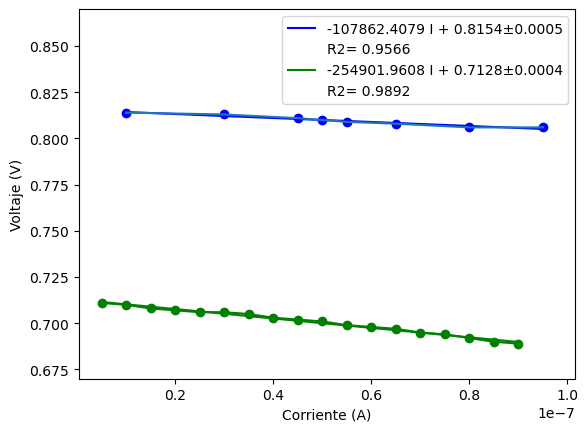

In [81]:
plt.scatter(I_Az, V_Az,color="blue")
plt.errorbar(I_Az,V_Az,yerr=0.0005)
plt.plot([I_Az[0], I_Az[-1]], [reg_blue[0]*I_Az[0] + reg_blue[1], reg_blue[0]*I_Az[-1] + reg_blue[1]], color="blue", label=str(reg_blue[0])+" I + "+str(reg_blue[1])+"±"+str(0.0005))
plt.scatter(I_Az+0.2e-8,V_Az+0.003, color="white",label="R2= "+str(reg_blue[2]))
plt.scatter(I_V, V_V,color="green")
plt.errorbar(I_V,V_V,yerr=0.0004,color="green")
plt.plot([I_V[0], I_V[-1]], [reg_green[0]*I_V[0] + reg_green[1], reg_green[0]*I_V[-1] + reg_green[1]], color="green",label=str(reg_green[0])+" I + "+str(reg_green[1])+"±"+str(0.0004))
plt.scatter(I_Az+0.2e-8,V_Az+0.003, color="white",label="R2= "+str(reg_green[2]))


plt.legend()
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.ylim(0.67,0.87)

In [36]:
regr_yellow=Regresion(I_Am,V_Am)
reg_yellow=(round(regr_yellow[0],4),round(regr_yellow[1],3),round(regr_yellow[2],4))
v_fren.append(reg_yellow[1])
v_fren

[0.8154, 0.7128, 0.495]

In [37]:
regr_red=Regresion(I_R,V_R)
reg_red=(round(regr_red[0],4),round(regr_red[1],4),round(regr_red[2],4))
v_fren.append(reg_red[1])
v_fren

[0.8154, 0.7128, 0.495, 0.3768]

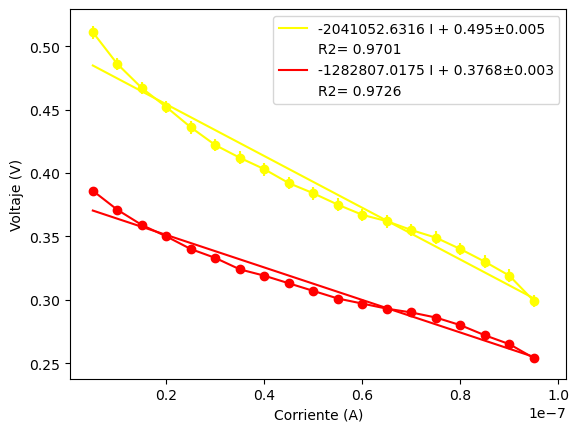

In [38]:
plt.scatter(I_Am, V_Am,color="yellow")
plt.plot([I_Am[0], I_Am[-1]], [reg_yellow[0]*I_Am[0] + reg_yellow[1], reg_yellow[0]*I_Am[-1] + reg_yellow[1]], color="yellow",label=str(reg_yellow[0])+" I + "+str(reg_yellow[1])+"±"+str(0.005))
plt.errorbar(I_Am,V_Am,yerr=0.005,color="yellow")
plt.scatter(I_R, V_R,color="red")
plt.scatter(I_Am+0.2e-8,V_Am+0.003, color="white",label="R2= "+str(reg_yellow[2]))
plt.plot([I_R[0], I_R[-1]], [reg_red[0]*I_R[0] + reg_red[1], reg_red[0]*I_R[-1] + reg_red[1]], color="red",label=str(reg_red[0])+" I + "+str(reg_red[1])+"±"+str(0.003))
plt.errorbar(I_R,V_R,yerr=0.003,color="red")
plt.scatter(I_Am+0.2e-8,V_Am+0.003, color="white",label="R2= "+str(reg_red[2]))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.legend()

In [39]:
regr_yel_low=Regresion(I_AmB,V_AmB)
reg_yel_low=(round(regr_yel_low[0],4),round(regr_yel_low[1],4),round(regr_yel_low[2],4))



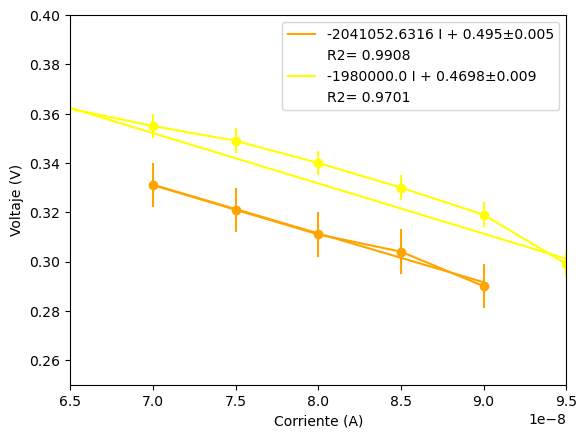

In [67]:
plt.scatter(I_AmB, V_AmB,color="orange")
plt.plot([I_AmB[0], I_AmB[-1]], [reg_yel_low[0]*I_AmB[0] + reg_yel_low[1], reg_yel_low[0]*I_AmB[-1] + reg_yel_low[1]], color="orange",label=str(reg_yellow[0])+" I + "+str(reg_yellow[1])+"±"+str(0.005))
plt.scatter(I_Am[:6], V_Am[:6],color="yellow")
plt.errorbar(I_Am,V_Am,yerr=0.005,color="yellow")
plt.scatter(I_AmB+0.2e-8,V_AmB+0.003, color="white",label="R2= "+str(reg_yel_low[2]))
plt.plot([I_Am[0], I_Am[-1]], [reg_yellow[0]*I_Am[0] + reg_yellow[1], reg_yellow[0]*I_Am[-1] + reg_yellow[1]], color="yellow",label=str(reg_yel_low[0])+" I + "+str(reg_yel_low[1])+"±"+str(0.009))
plt.scatter(I_AmB+0.2e-8,V_AmB+0.003, color="white",label="R2= "+str(reg_yellow[2]))
plt.errorbar(I_AmB,V_AmB,yerr=0.009,color="orange")
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje (V)")
plt.xlim(6.5e-8,9.5e-8)
plt.ylim(0.25,0.4)
plt.legend()

In [42]:
c=3e8
L_rojo=659e-9
L_am=590e-9
L_v=567e-9
L_az=469e-9

f_r=c/L_rojo
f_am=c/L_am
f_v=c/L_v
f_az=c/L_az

In [45]:
v_frena=np.array(v_fren)
vq=v_frena*(e)

frec= np.array((f_az, f_v,f_am, f_r))
vq,frec


(array([1.30641757e-19, 1.14203390e-19, 7.93079100e-20, 6.03701424e-20]),
 array([6.39658849e+14, 5.29100529e+14, 5.08474576e+14, 4.55235205e+14]))

In [54]:
regr_h=Regresion(frec,vq)
reg_h=(round(regr_h[0],35),round(regr_h[1],21),round(regr_h[2],4))
reg_h

(3.8e-34, -1.05e-19, 0.8333)

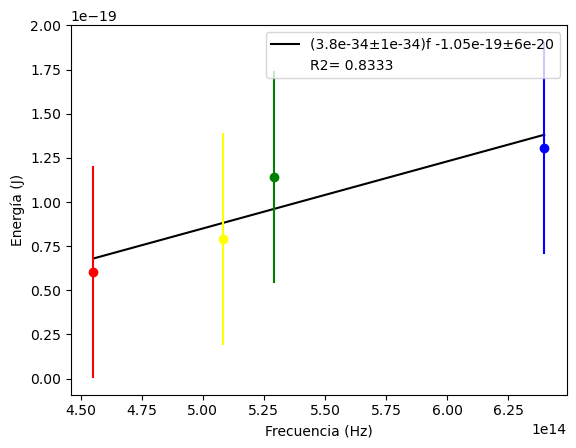

In [57]:
plt.plot([frec[0], frec[-1]], [reg_h[0]*frec[0] + reg_h[1], reg_h[0]*frec[-1] + reg_h[1]], color="black",label="("+str(reg_h[0])+"±"+str(1e-34)+")"+"f "+str(reg_h[1])+"±"+str(6e-20))
plt.scatter(6.39658849e+14,1.30641757e-19, color="white",label="R2= "+str(reg_h[2]))
plt.errorbar(6.39658849e+14,1.30641757e-19, color="blue",yerr=6e-20)
plt.scatter(6.39658849e+14,1.30641757e-19, color="blue")
plt.errorbar(5.29100529e+14,1.14203390e-19, color="green",yerr=6e-20)
plt.scatter(5.29100529e+14,1.14203390e-19, color="green")
plt.errorbar(5.08474576e+14,7.92598446e-20, color="yellow",yerr=6e-20)
plt.scatter(5.08474576e+14,7.92598446e-20, color="yellow")
plt.errorbar(4.55235205e+14,6.03701424e-20, color="red",yerr=6e-20)
plt.scatter(4.55235205e+14,6.03701424e-20, color="red")


plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Energía (J)")
plt.legend()

In [4]:
lam=np.array((410,434,656))
p=np.array((q.Measurement(785,0.4,unit="nm"),q.Measurement(877,0.4,unit="nm"),q.Measurement(1187,0.4,unit="nm")))



lam,p,cuad

NameError: name 'cuad' is not defined

Text(0, 0.5, 'Longitud de Onda')

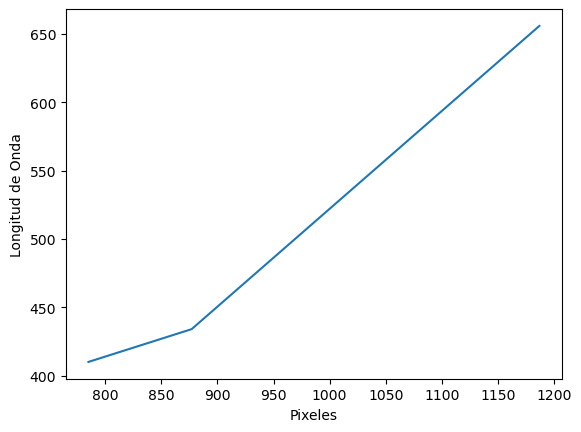

In [5]:
lambd=np.array((410,434,656))
pix=np.array((785,877,1187))
plt.plot(pix,lambd)
plt.xlabel("Pixeles")
plt.ylabel("Longitud de Onda")

In [6]:
 modelo = np.poly1d (np.polyfit (pix,lambd, 2))

In [7]:
np.array(modelo)
modelo[0],modelo[1],modelo[2],modelo

(984.8718783362214,
 -1.6213225597119447,
 0.0011324862364195793,
 poly1d([ 1.13248624e-03, -1.62132256e+00,  9.84871878e+02]))

In [8]:
X=sym.Symbol("x",real=True)
np.array(modelo)
modelo[0],modelo[1],modelo[2],modelo
ec=lambda x:modelo[2]*x**2 + modelo[1]*x +modelo[0]
ecu=modelo[2]*X**2 + modelo[1]*X +modelo[0]
ecuaci=ec(X)
ecuaci

0.00113248623641958*x**2 - 1.62132255971194*x + 984.871878336221

In [9]:
sym.solve(0.00113*X**2-1.62*X+984.87,X)

[]

In [10]:
ec(785)

410.0

In [11]:
from scipy.stats import bootstrap
import numpy as np

#convert array to sequence
data = (pix,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(data, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)

#ConfidenceInterval(low=10.0, high=20.0)

ConfidenceInterval(low=785.0, high=1187.0)


In [12]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [13]:
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [14]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,pix,lambd)
f_sym = sym.simplify(f)
f_sym

0.00113248623641959*x**2 - 1.62132255971196*x + 984.87187833623

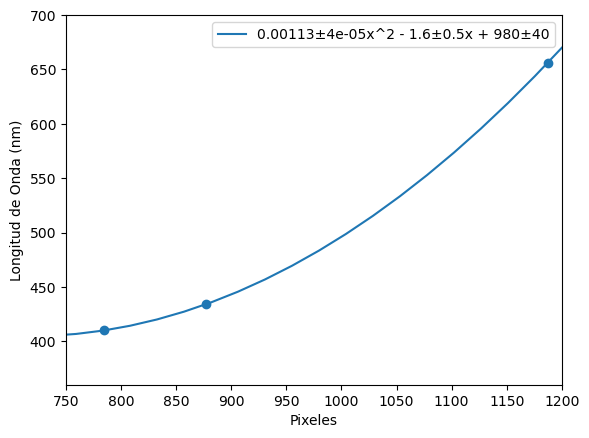

In [15]:
xs=np.linspace(0,1200)

ys=ec(xs)

plt.scatter(pix,lambd)
plt.plot(xs,ys,label=str(1.13e-3)+"±"+str(0.00004)+"x^2 - "+str(1.6)+"±"+str(0.5)+"x + "+str(980)+"±"+str(40))
plt.xlim(750,1200)
plt.ylim(360,700)
plt.xlabel("Pixeles")
plt.ylabel("Longitud de Onda (nm)")
plt.legend()

In [30]:
helium=np.array((883,902,1054,1197))
hy=ec(helium)
hy

array([436.2311193 , 443.83426137, 534.09498022, 666.78524628])

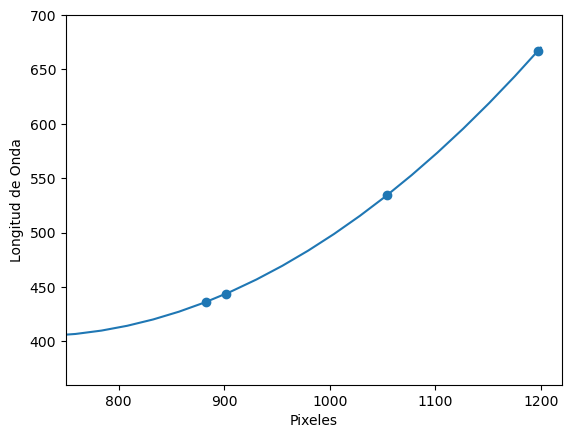

In [31]:
plt.scatter(helium,hy)
plt.xlim(750,1220)
plt.ylim(360,700)
plt.xlabel("Pixeles")
plt.ylabel("Longitud de Onda")

plt.plot(xs,ys)

In [32]:
mercury=np.array((800,993,1050))
my=ec(mercury)
my

array([412.60502188, 491.58549748, 531.04926629])

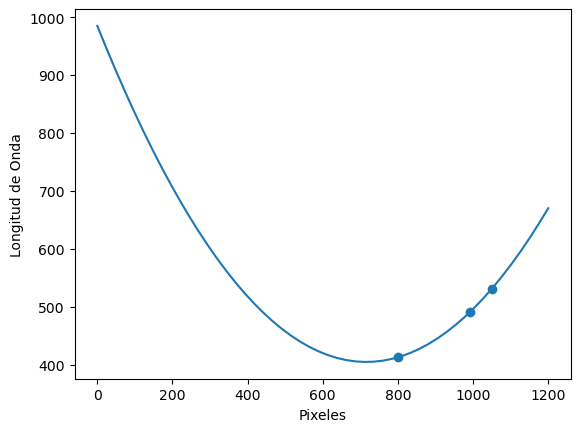

In [34]:
plt.scatter(mercury,my)
plt.xlabel("Pixeles")
plt.ylabel("Longitud de Onda")
#plt.ylim(360,600)
#plt.xlim(360,600)
plt.plot(xs,ys)

In [28]:
merc=np.array((800,993,1050))
mey=ec(merc)
mey

array([412.60502188, 491.58549748, 531.04926629])

In [9]:
#Helio

azul=ec(np.array((968,928)))
ama=ec(np.array((1125,1088)))
roj=ec(np.array((1256,1243)))

azul,ama,roj

(array([476.59842373, 455.56356995]),
 array([594.18689163, 561.44672081]),
 array([735.02855079, 719.31466371]))

In [25]:
azul_He=helium[1]/(azul[0]-azul[1])
ama_He=helium[2]/(ama[0]-ama[1])
rojo_He=helium[3]/(roj[0]-roj[1])

azul_He,ama_He,rojo_He

(42.88121084016007, 32.192868081170005, 76.17465961321689)

In [32]:
#Hidrogeno
morado=ec(np.array((832,821)))
az=ec(np.array((933,907)))
red=ec(np.array((1249,1219)))

morado,az,red

(array([419.86566118, 417.1082121 ]),
 array([457.99474158, 445.97098658]),
 array([726.51966256, 691.3100584 ]))

In [33]:
purp_H=lambd[0]/(morado[0]-morado[1])
azul_H=lambd[1]/(az[0]-az[1])
rojo_H=lambd[2]/(red[0]-red[1])

purp_H,azul_H,rojo_H

(148.68814912155247, 36.09521319083165, 18.631280179881358)

In [37]:
#Mercurio
bl=ec(np.array((876,855)))
gr=ec(np.array((1071,1054)))
yel=ec(np.array((1123,1109)))

bl,gr,yel

(array([433.63607419, 426.51684076]),
 array([547.44356199, 534.09498022]),
 array([592.33787863, 579.64846455]))

In [38]:
yel[0]-yel[1]

12.689414079671906

In [39]:
azul_Hg=mercury[0]/(bl[0]-bl[1])
verde_Hg=mercury[1]/(gr[0]-gr[1])
ama_Hg=mercury[2]/(yel[0]-yel[1])


azul_Hg,verde_Hg,ama_Hg

(112.3716490405992, 74.38992521426616, 82.74613732418672)

In [40]:
bl[0]-bl[1]

7.119233426137271

In [38]:
mercury

array([ 800,  993, 1050])

In [35]:
lin1_Hg=529.365/1.13
lin2_Hg=532.365/1.58

lin1_Hg,lin2_Hg


(468.46460176991155, 336.9398734177215)

In [1]:
import statistics as st

In [5]:
amb=[19,23,17,21,17]
st.stdev(amb)

2.6076809620810595

In [8]:
Min_1=[151.6,143.6,155.6]

st.stdev(Min_1)

6.110100926607787

In [4]:
Min_3=[426.6,429.6,431.6]
st.stdev(Min_3)

2.516611478423583

In [6]:
Min_5=[782.6,753.6,759.6]
st.stdev(Min_5)

15.30795000427338

In [9]:
#Distintas distancias

cm_2=[225.6,234.6,247.6]
st.stdev(cm_2)

11.060440015358038

In [10]:
cm_4=[109.6,101.6,108.6]
st.stdev(cm_4)

4.358898943540674

In [11]:
cm_6=[89.9,72.6,83.6]
st.stdev(cm_6)

8.7557600088932

In [12]:
cm_8=[51.6,47.6,46.6]
st.stdev(cm_8)

2.6457513110645907

In [13]:
cm_10=[30.6,21.6,31.6]
st.stdev(cm_10)

5.507570547286102

In [14]:
#Dinstintos materiales

papel=[655.6,680.6,695.6,720.6]
st.stdev(papel)

27.23355773061365

In [15]:
aluminio=[286.6,277.6,240.6,280.6]
st.stdev(aluminio)

20.83866598417472

In [16]:
plomo=[172.6,183.6,162.6,175.6]
st.stdev(plomo)

8.679477710861024

In [9]:
dist=np.array([2,4,6,8,10])
rad=np.array([235.93,106.6,82.03,48.6,27.83])

Text(0, 0.5, 'Radiación')

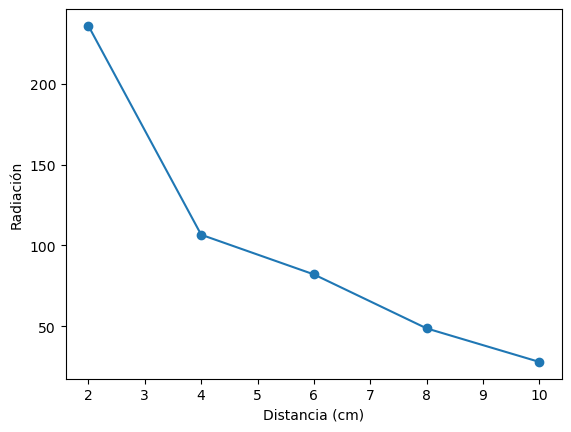

In [10]:
plt.scatter(dist,rad)
plt.plot(dist,rad)
plt.xlabel("Distancia (cm)")
plt.ylabel("Radiación")

In [11]:
ajuste = np.poly1d (np.polyfit (dist,rad, 2))

In [12]:
X=sym.Symbol("x",real=True)
ec=lambda x:ajuste[2]*x**2 + ajuste[1]*x +ajuste[0]
ecu=ajuste[2]*X**2 + ajuste[1]*X +ajuste[0]
ecuaci=ec(X)
ecuaci

3.71892857142858*x**2 - 68.3371428571429*x + 346.588

In [13]:
rd=ec(rad)
rd

array([191230.39642275,  35322.11652857,  19765.26836132,   5809.36338571,
         1325.10859132])

In [21]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,dist,rad)
f_sym = sym.simplify(f)
f_sym

0.351927083333334*x**4 - 9.405625*x**3 + 90.7697916666666*x**2 - 388.1575*x + 718.78

In [24]:
xs=np.linspace(dist[0],dist[-1],30)
xs

array([ 2.        ,  2.27586207,  2.55172414,  2.82758621,  3.10344828,
        3.37931034,  3.65517241,  3.93103448,  4.20689655,  4.48275862,
        4.75862069,  5.03448276,  5.31034483,  5.5862069 ,  5.86206897,
        6.13793103,  6.4137931 ,  6.68965517,  6.96551724,  7.24137931,
        7.51724138,  7.79310345,  8.06896552,  8.34482759,  8.62068966,
        8.89655172,  9.17241379,  9.44827586,  9.72413793, 10.        ])

In [76]:
ecs=lambda x: 800/(0.6*x**2) +20
ys=ecs(xs)

(0.0, 270.0)

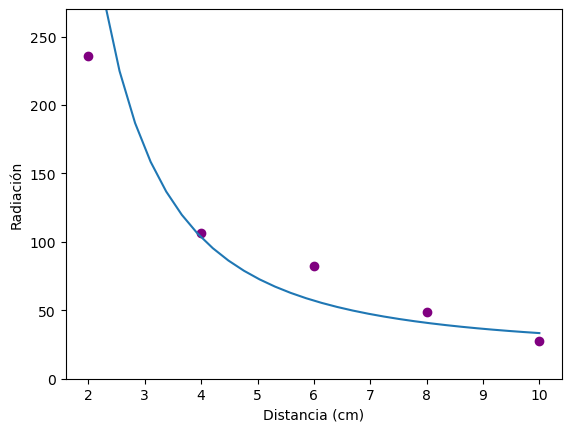

In [79]:
plt.plot(xs,ys)
plt.scatter(dist,rad,color="purple")
plt.xlabel("Distancia (cm)")
plt.ylabel("Radiación")
plt.ylim(0,270)

Text(0, 0.5, 'Radiación')

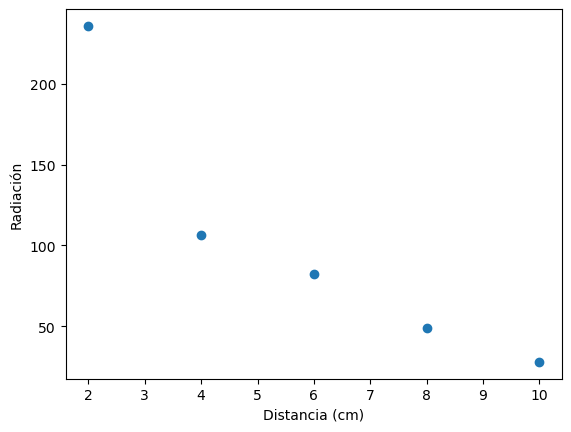

In [80]:
plt.scatter(dist,rad)
#plt.plot(xs,
plt.xlabel("Distancia (cm)")
plt.ylabel("Radiación")

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Definir la función racional
def rational_function(x, a, b):
    return (a) / (b*x**2)

# Datos de ejemplo (reemplázalos con tus propios datos)
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1.2, 1.9, 3.2, 4.1, 5.0])

# Ajustar el modelo a los datos usando curve_fit de scipy.optimize
params, covariance = curve_fit(rational_function, dist, rad)

# Parámetros de la función racional
a, b = params

# Imprimir los parámetros encontrados
print("Parámetros de la función racional:")
print("a =", a)
print("b =", b)
print("c =", c)
print("d =", d)

# Predecir valores usando la función racional ajustada
x_new = np.array([6, 7, 8])  # Nuevos valores para predecir
y_pred = rational_function(x_new, a, b)

# Imprimir las predicciones
print("Predicciones para nuevos valores de x:")
print("x_new =", x_new)
print("y_pred =", y_pred)

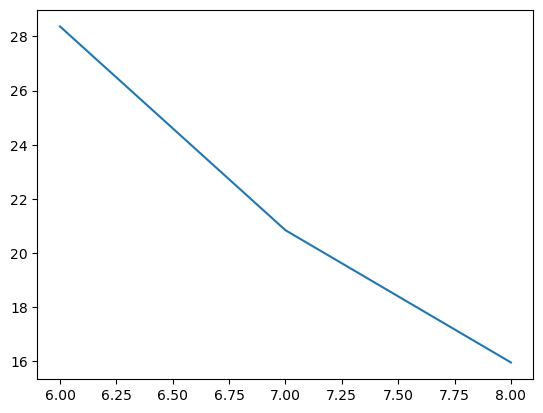

In [34]:
plt.plot(x_new,y_pred)

In [9]:
minim=np.array((73,143,221,292,369))
dist=np.array((0.5e-3,0.75e-3,1e-3,1.25e-3,1.5e-3))
pend=Regresion(minim,dist)
M=pend[0]
b=pend[1]
R2=pend[2]
M=M.round(8)
b=b.round(6)
M,b

(3.37e-06, 0.000259)

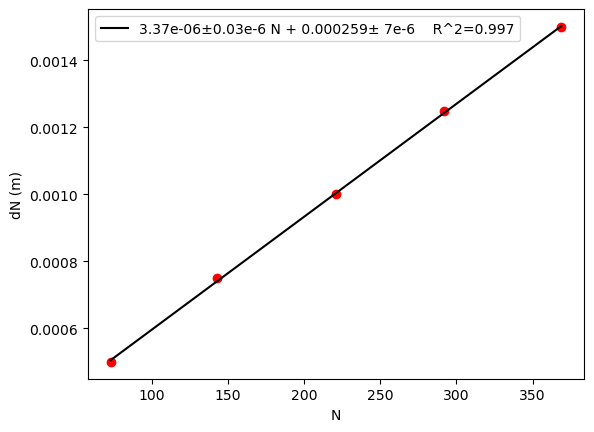

In [13]:

xs=np.linspace(73,369,200)
ys=M*xs +b

plt.plot(xs,ys, color="black", label=str(M)+"±0.03e-6 N + "+str(b)+"± 7e-6  " +"  R^2=0.997")
plt.scatter(minim, dist, color="red")
plt.errorbar(minim[0],dist[0],color="red",yerr=0.03e-6)
plt.errorbar(minim[1],dist[1],color="red",yerr=0.03e-6)
plt.errorbar(minim[2],dist[2],color="red",yerr=0.03e-6)
plt.errorbar(minim[4],dist[4],color="red",yerr=0.03e-6)
plt.errorbar(minim[3],dist[3],color="red",yerr=0.03e-6)

plt.xlabel("N")
plt.ylabel("dN (m)")
plt.legend()

<ErrorbarContainer object of 3 artists>

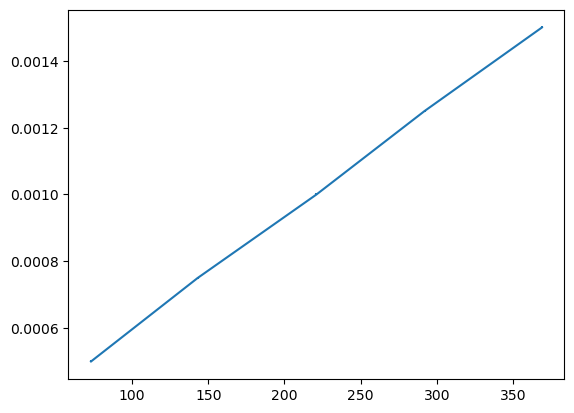

In [42]:
plt.errorbar(minim,dist,yerr=3e-6)

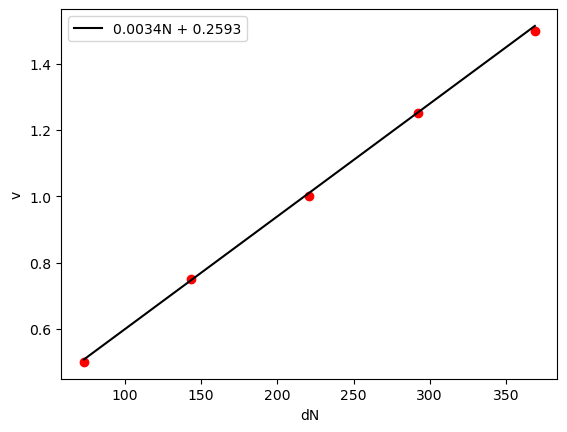

In [11]:
plt.plot(xs,ys, color="black", label=str(M)+"N + "+str(b))
plt.scatter(minim, dist, color="red")
plt.xlabel("dN")
plt.ylabel("v")
plt.legend()

(296.4, -76.8, 0.9997250706440994)

# CARGA MASA

In [40]:
n_3=np.array((1,2,3))
n_4=np.array((1,2,3,4))

VI_300=np.array((1.22,2.93,3.13))

reg_300=Regresion(n_3,VI_300)

ys_300=reg_300[0]*n_3+reg_300[1]

In [6]:
VI_350=np.array((1.32,2.34,3.25,4.46))

reg_350=Regresion(n_4,VI_350)


ys_350=reg_350[0]*n_4+reg_350[1]
#plt.plot(n_4,VI_350)

In [7]:
VI_400=np.array((1.23,2.49,3.34,4.43))

reg_400=Regresion(n_4,VI_400)

ys_400=reg_400[0]*n_4+reg_400[1]
#plt.plot(n_4,VI_400)

In [8]:
VI_450=np.array((1.24,2.63,3.69,4.69))

reg_450=Regresion(n_4,VI_450)

ys_450=reg_450[0]*n_4+reg_450[1]
#plt.plot(n_4,VI_450)

In [9]:
VI_500=np.array((1.3,2.74,3.95))

reg_500=Regresion(n_3,VI_500)

ys_500=reg_500[0]*n_3+reg_500[1]
#plt.plot(n_3,VI_500)

In [10]:
VI_550=np.array((1.4,2.92,4.14))

reg_550=Regresion(n_3,VI_550)

ys_550=reg_550[0]*n_3+reg_550[1]
#plt.plot(n_3,VI_550)

In [11]:
VI_600=np.array((1.45,3.12,4.49))

reg_600=Regresion(n_3,VI_600)

ys_600=reg_600[0]*n_3+reg_600[1]
#plt.plot(n_3,VI_600)

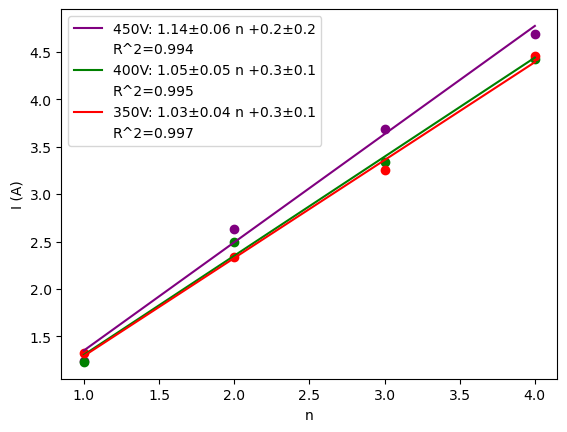

In [37]:

plt.scatter(n_4,VI_450,color="purple")
plt.plot(n_4,ys_450,color="purple",label="450V: "+str(round(reg_450[0],2))+"±0.06 n +"+str(round(reg_450[1],1))+"±0.2")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_450[2],3)))
plt.scatter(n_4,VI_400,color="green")
plt.plot(n_4,ys_400,color="green",label="400V: "+str(round(reg_400[0],2))+"±0.05 n +"+str(round(reg_400[1],1))+"±0.1")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_400[2],3)))
plt.scatter(n_4,VI_350,color="red")
plt.plot(n_4,ys_350,color="red",label="350V: "+str(round(reg_350[0],2))+"±0.04 n +"+str(round(reg_350[1],1))+"±0.1")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_350[2],3)))

plt.xlabel("n")
plt.ylabel("I (A)")
plt.legend()

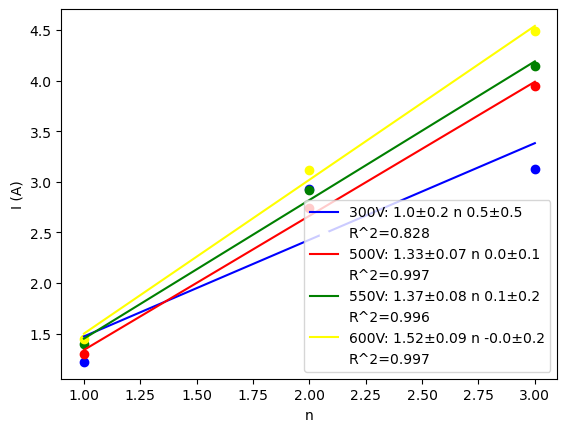

In [41]:
plt.scatter(n_3,VI_300, color="blue")
plt.plot(n_3,ys_300,color="blue",label="300V: "+str(round(reg_300[0],1))+"±0.2 n "+str(round(reg_300[1],1))+"±0.5")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_300[2],3)))
plt.scatter(n_3,VI_500,color="red")
plt.plot(n_3,ys_500,color="red",label="500V: "+str(round(reg_500[0],2))+"±0.07 n "+str(round(reg_500[1],1))+"±0.1")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_500[2],3)))
plt.scatter(n_3,VI_550,color="green")
plt.plot(n_3,ys_550,color="green",label="550V: "+str(round(reg_550[0],2))+"±0.08 n "+str(round(reg_550[1],1))+"±0.2")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_550[2],3)))
plt.scatter(n_3,VI_600,color="yellow")
plt.plot(n_3,ys_600,color="yellow",label="600V: "+str(round(reg_600[0],2))+"±0.09 n "+str(round(reg_600[1],1))+"±0.2")
plt.scatter(1.5,3,color="white",label="R^2="+str(round(reg_600[2],3)))



plt.xlabel("n")
plt.ylabel("I (A)")
plt.legend()

In [23]:
V_3=np.array((300,350,400,450,500,550,600))
V_4=np.array((350,400,450))


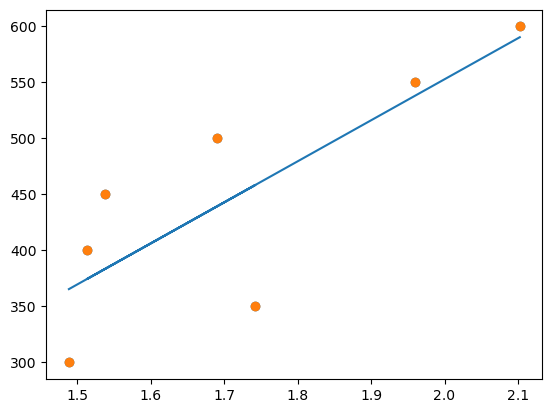

In [24]:
nI_0=np.array((1.22,1.32,1.23,1.24,1.3,1.4,1.45))
nI2_0=nI_0**2
reg1=Regresion(nI2_0,V_3)
ys_n0=reg1[0]*nI2_0+reg1[1]
plt.scatter(nI2_0,V_3)
plt.plot(nI2_0,ys_n0)


plt.scatter(nI2_0,V_3)

In [25]:
reg1

(366.2475163050266, -179.62133738734687, 0.6421365382302322)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


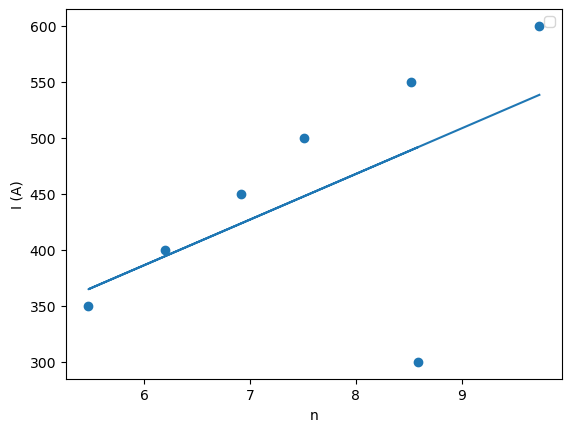

In [26]:
nI_2=np.array((2.93,2.34,2.49,2.63,2.74,2.92,3.12))
nI2_2=nI_2**2

reg_600=Regresion(n_3,VI_600)

ys_600=reg_600[0]*n_3+reg_600[1]

reg2=Regresion(nI2_2,V_3)
ys_n2=reg2[0]*nI2_2+reg2[1]
plt.scatter(nI2_2,V_3)
plt.plot(nI2_2,ys_n2)
plt.xlabel("n")
plt.ylabel("I (A)")
plt.legend()


In [27]:
reg2

(40.74867053183953, 141.7892806983253, 0.31602340369035786)

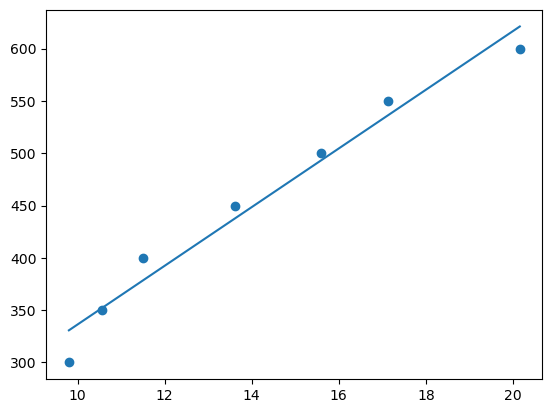

In [28]:
nI_1=np.array((3.13,3.25,3.39,3.69,3.95,4.14,4.49))
nI2_1=nI_1**2

reg_600=Regresion(n_3,VI_600)

ys_600=reg_600[0]*n_3+reg_600[1]

reg=Regresion(nI2_1,V_3)
ys_n1=reg[0]*nI2_1+reg[1]
plt.scatter(nI2_1,V_3)
plt.plot(nI2_1,ys_n1)


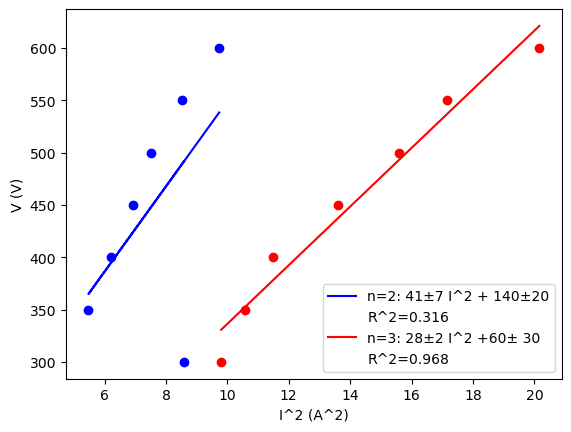

In [44]:
plt.scatter(nI2_2,V_3,color="blue")
plt.plot(nI2_2,ys_n2,color="blue",label="n=2: "+str(round(reg2[0]))+"±7 I^2 + 140±20")
plt.scatter(12,500,color="white",label="R^2="+str(round(reg2[2],3)))
plt.scatter(nI2_1,V_3,color="red")
plt.plot(nI2_1,ys_n1,color="red",label="n=3: "+str(round(reg[0]))+"±2 I^2 +60± 30")
plt.scatter(12,500,color="white",label="R^2="+str(round(reg[2],3)))


plt.xlabel("I^2 (A^2)")
plt.ylabel("V (V)")
plt.legend()

In [72]:
reg

(28.02434096952486, 56.178740528004774, 0.9679247057918604)

In [74]:
ys_n1
len(n_4)

4

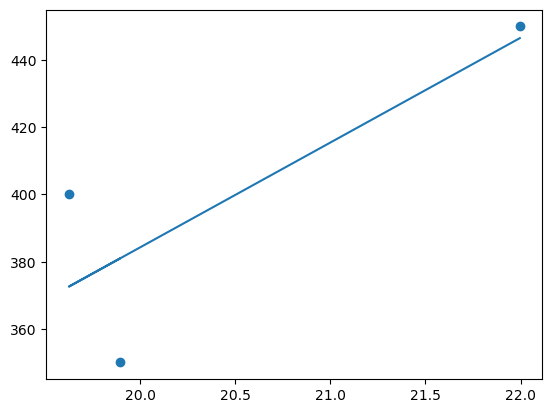

In [76]:
nI_4=np.array((4.46,4.43,4.69))
nI2_4=nI_4**2


reg4=Regresion(nI2_4,V_4)
ys_n4=reg4[0]*nI2_4+reg4[1]
plt.scatter(nI2_4,V_4)
plt.plot(nI2_4,ys_n4)

In [77]:
reg4

(31.18505096326074, -239.42452196089076, 0.6562893975218854)

Para n=2 se obtuvo una relación carga masa de $1.57\times 10^{11}$C/kg,  y para n=3 se obtuvo un valor de $2.43\times 10^{11} $C/kg. En promedio, el valor hallado experimentalmente para la relación carga-masa es de $2\times 10^{11}$C/kg


# Efecto Hall

In [3]:
I=np.array((1,1.98,3.4,5,6.5,8.6,9.5,10.3))
V=np.array((0.05e-5,0.1e-5,0.15e-5,0.17e-5,0.2e-5,0.25e-5,0.26e-5,0.35e-5))

reg=Regresion(I,V)
reg

(2.644187873548969e-07, 3.828373151519214e-07, 0.9444577606018495)

In [4]:
regresion=I*reg[0]+reg[1]
regresion

array([6.47256103e-07, 9.06386514e-07, 1.28186119e-06, 1.70493125e-06,
       2.10155943e-06, 2.65683889e-06, 2.89481580e-06, 3.10635082e-06])

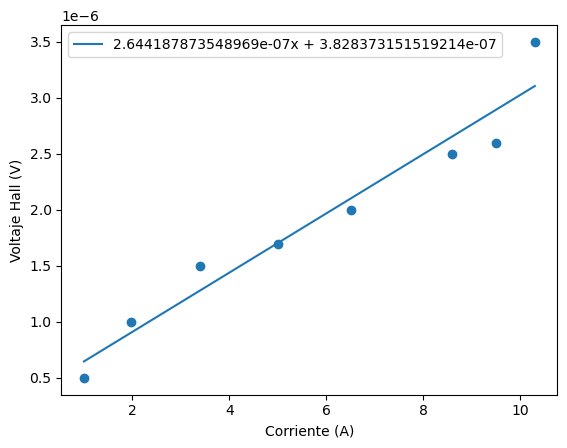

In [5]:
plt.scatter(I,V)
plt.plot(I,regresion, label= str(reg[0])+"x + "+str(reg[1]))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Hall (V)")
plt.legend()

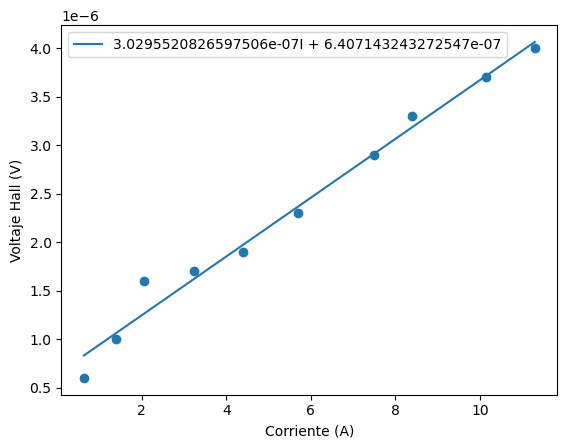

In [6]:
I2=np.array((0.63,1.4,2.06,3.24,4.4,5.7,7.49,8.4,10.15,11.3))
V2=np.array((0.06e-5,0.1e-5,0.16e-5,0.17e-5,0.19e-5,0.23e-5,0.29e-5,0.33e-5,0.37e-5,0.4e-5))

reg2=Regresion(I2,V2)
ys2=I2*reg2[0] +reg2[1] 

plt.scatter(I2,V2)
plt.plot(I2,ys2, label= str(reg2[0])+"I + "+str(reg2[1]))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Hall (V)")
plt.legend()

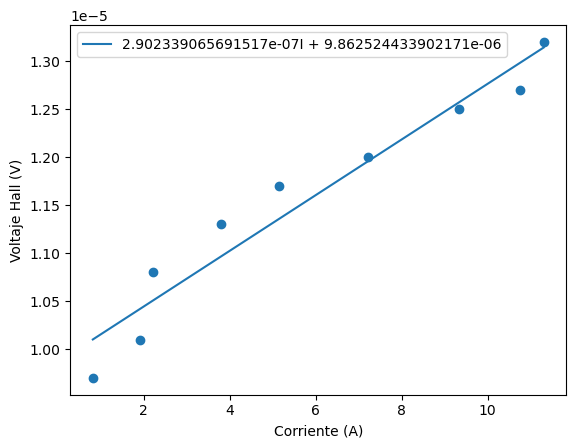

In [7]:
I3=np.array((0.82,1.91,2.22,3.8,5.14,7.22,9.34,10.75,11.3))
V3=np.array((0.97e-5,1.01e-5,1.08e-5,1.13e-5,1.17e-5,1.2e-5,1.25e-5,1.27e-5,1.32e-5))

reg3=Regresion(I3,V3)
ys3=I3*reg3[0] +reg3[1] 

plt.scatter(I3,V3)
plt.plot(I3,ys3, label= str(reg3[0])+"I + "+str(reg3[1]))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Hall (V)")
plt.legend()

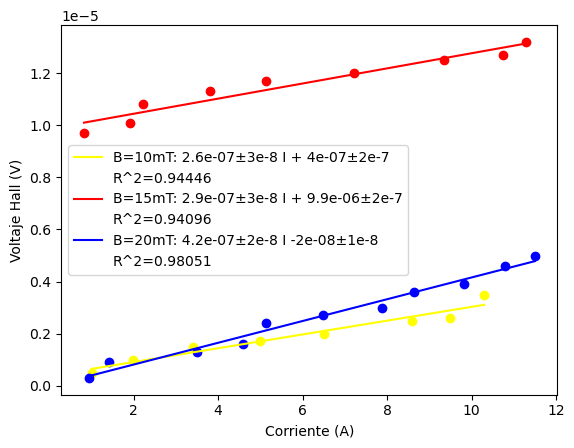

In [10]:
I4=np.array((0.95,1.42,3.5,4.58,5.14,6.48,7.88,8.63,9.81,10.8,11.5))
V4=np.array((0.03e-5,0.09e-5,0.13e-5,0.16e-5,0.24e-5,0.27e-5,0.3e-5,0.36e-5,0.39e-5,0.46e-5,0.5e-5))

reg4=Regresion(I4,V4)
ys4=I4*reg4[0] +reg4[1] 




plt.scatter(I,V,color="yellow")
plt.plot(I,regresion,color="yellow", label= "B=10mT: "+str(round(reg[0],8))+"±3e-8 I + "+str(round(reg[1],7))+"±2e-7")
plt.scatter(2,1.2e-5,color="white", label="R^2="+str(round(reg[2],5)))
plt.scatter(I3,V3,color="red")
plt.plot(I3,ys3,color="red", label= "B=15mT: "+str(round(reg3[0],8))+"±3e-8 I + "+str(round(reg3[1],7))+"±2e-7")
plt.scatter(2,1.2e-5,color="white", label="R^2="+str(round(reg3[2],5)))
plt.scatter(I4,V4,color="blue")
plt.plot(I4,ys4,color="blue", label= "B=20mT: "+str(round(reg4[0],8))+"±2e-8 I "+str(round(reg4[1],8))+"±1e-8")
plt.scatter(2,1.2e-5,color="white", label="R^2="+str(round(reg4[2],5)))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Hall (V)")
plt.legend()

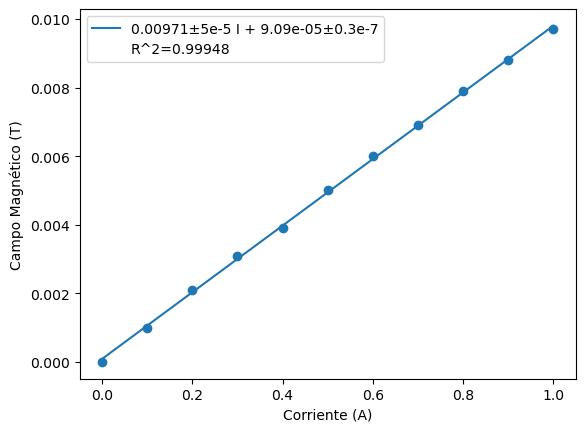

In [11]:
#Caracterizacion campo magnetico

I_B=np.array((0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))
B=np.array((0e-3,1e-3,2.1e-3,3.1e-3,3.9e-3,5e-3,6e-3,6.9e-3,7.9e-3,8.8e-3,9.7e-3))

regB=Regresion(I_B,B)
ys=I_B*regB[0]+regB[1]

plt.scatter(I_B,B)
plt.plot(I_B,ys, label=str(round(regB[0],5))+"±5e-5" +" I + "+str(round(regB[1],7))+"±0.3e-7")
plt.scatter(0.22,0.006,color="white", label="R^2="+str(round(regB[2],5)))
plt.xlabel("Corriente (A)")
plt.ylabel("Campo Magnético (T)")
plt.legend()

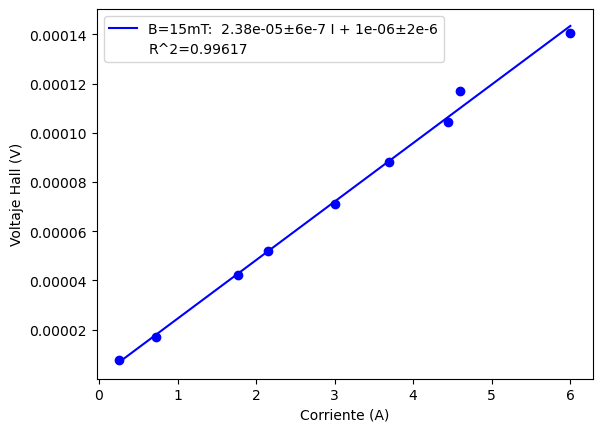

In [14]:
#ZInc
Iz1=np.array((0.26,0.73,1.77,2.15,3,3.69,4.44,4.6,6))
Vz1=np.array((0.76e-5,1.71e-5,4.21e-5,5.2e-5,7.12e-5,8.83e-5,10.42e-5,11.7e-5,14.05e-5))

regz1=Regresion(Iz1,Vz1)
ysz1=Iz1*regz1[0] +regz1[1] 



plt.scatter(Iz1,Vz1,color="blue")
plt.plot(Iz1,ysz1,color="blue", label= "B=15mT:  "+str(round(regz1[0],7))+"±6e-7 I + "+str(round(regz1[1],6))+"±2e-6")
plt.scatter(2,1.2e-4,color="white", label="R^2="+str(round(regz1[2],5)))
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Hall (V)")
plt.legend()

In [ ]:
def contar_hormigas(cantidad,meses):
    total=

In [8]:
def contar(cant,meses):
    
    for mes in range(meses):
        
        if cant<7000:
            cant=0
        
        if cant> 28000:
            cant+=0.31*cant
            cant-=7000
        if cant>= 7000 and cant<=28000:
            cant+=0.4*cant
            cant-=7000
        
        cant=round(cant)
        return cant
        

In [9]:

contar(7001,1)

2801

In [5]:
def contar_hormigas(cantidad_inicial: int, meses: int)->int:
    """ Conteo de Hormigas
    Parámetros:
      cantidad_inicial (int): La cantidad inicial de hormigas en la isla
      meses (int): La cantidad de meses después de la cual se deben contar las hormigas
    Retorno:
      int: Retorna la cantidad de hormigas que habrá en la isla después de la cantidad de meses indicada. La
           cantidad de hormigas debe estar redondeada al entero más cercano.
    """
    total_hormigas = cantidad_inicial

    for mes in range (meses):
        if total_hormigas < 7000:
            total_hormigas = 0
        else:
            if total_hormigas > 28000:
                hormigas_mes = round(0.31 * total_hormigas)
            else:
                hormigas_mes = round(0.4 * total_hormigas) 
            total_hormigas += hormigas_mes 
            if total_hormigas >= 7000:
               total_hormigas -= 7000
        
    return total_hormigas

In [10]:
contar_hormigas(7001,1)

2801

# HIstéresis Magnética


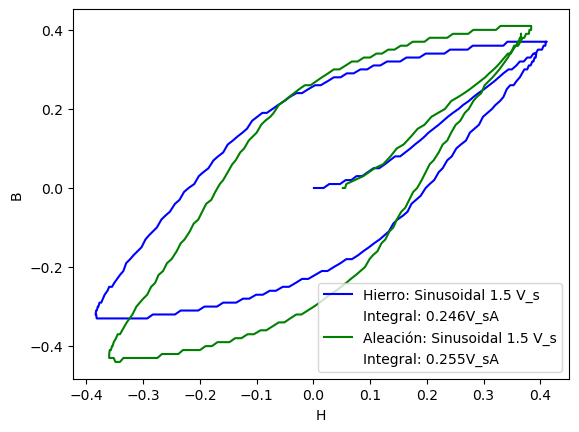

In [18]:
# Núcleo 1: Hierro
H1s,B1s=cargar("N1_Sin1.txt")
H2s,B2s=cargar("N2_Sin1.txt")

plt.plot(B1s,H1s, label="Hierro: Sinusoidal 1.5 V_s", color="blue")
plt.scatter(0,0,label="Integral: 0.246V_sA",color="white")
plt.plot(B2s,H2s,label="Aleación: Sinusoidal 1.5 V_s", color="green")
plt.scatter(0,0,label="Integral: 0.255V_sA ",color="white")
plt.xlabel("H")
plt.ylabel("B")
plt.legend()

Curva de histéresis para el núcleo de hierro al aplicar el campo mediante una función sinusoidal con configuración de $1.5U/V_s$. Se obtuvo una integral de $0.246V_sA$. Siendo esta bastante similar a la obtenida con la aleación, auqnue un poco menor.

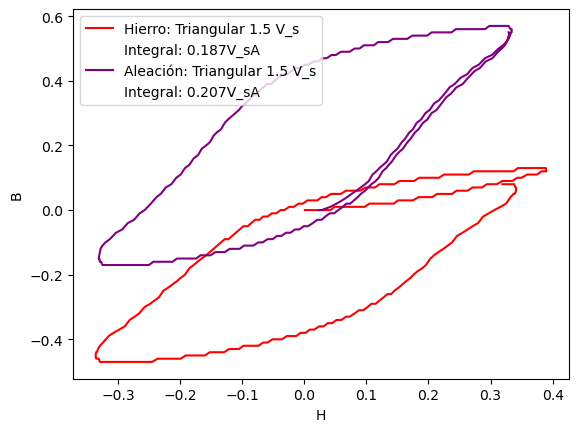

In [20]:
H1t,B1t=cargar("N1_Trian1.txt")
H2t,B2t=cargar("N2_Trian1.txt")

plt.plot(B1t,H1t, label="Hierro: Triangular 1.5 V_s", color="red")
plt.scatter(0,0,label="Integral: 0.187V_sA ",color="white")
plt.plot(B2t,H2t,label="Aleación: Triangular 1.5 V_s", color="purple")
plt.scatter(0,0,label="Integral: 0.207V_sA ",color="white")
plt.xlabel("H")
plt.ylabel("B")
plt.legend()

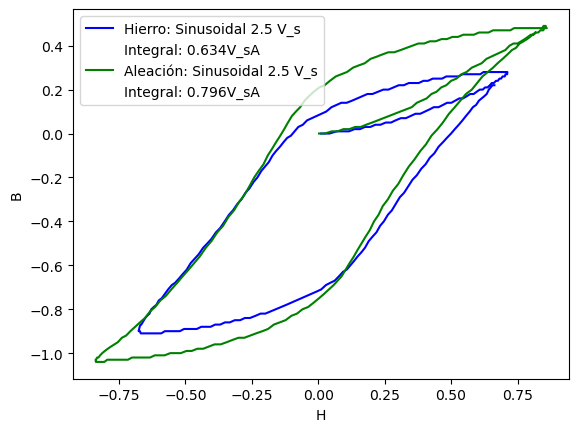

In [21]:
H1s2,B1s2=cargar("N1_Sin2.txt")
H2s2,B2s2=cargar("N2_Sin2.txt")

plt.plot(B1s2,H1s2, label="Hierro: Sinusoidal 2.5 V_s", color="blue")
plt.scatter(0,0,label="Integral: 0.634V_sA ",color="white")
plt.plot(B2s2,H2s2,label="Aleación: Sinusoidal 2.5 V_s", color="green")
plt.scatter(0,0,label="Integral: 0.796V_sA ",color="white")
plt.xlabel("H")
plt.ylabel("B")
plt.legend()



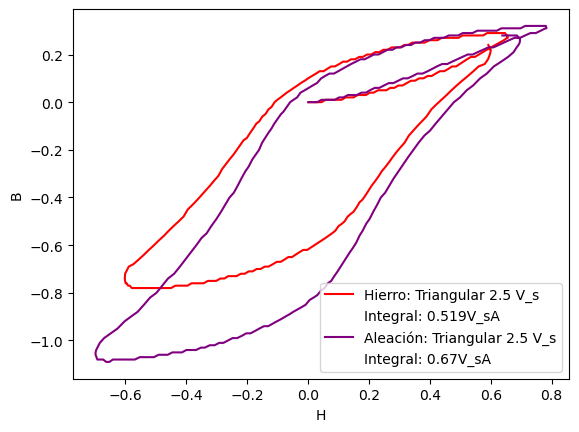

In [22]:
H1t2,B1t2=cargar("N1_Trian2.txt")
H2t2,B2t2=cargar("N2_Trian2.txt")

plt.plot(B1t2,H1t2, label="Hierro: Triangular 2.5 V_s", color="red")
plt.scatter(0,0,label="Integral: 0.519V_sA ",color="white")
plt.plot(B2t2,H2t2,label="Aleación: Triangular 2.5 V_s", color="purple")
plt.scatter(0,0,label="Integral: 0.67V_sA ",color="white")
plt.xlabel("H")
plt.ylabel("B")
plt.legend()

Curva de histéresis para el núcleo de la aleación al aplicar el campo mediante una función sinusoidal con configuración de $1.5U/V_s$. Se obtuvo una integral de $0.255V_sA$ siendo esta un poco mayor que la encontrada con el núcleo de hierro.

Text(0, 0.5, 'B')

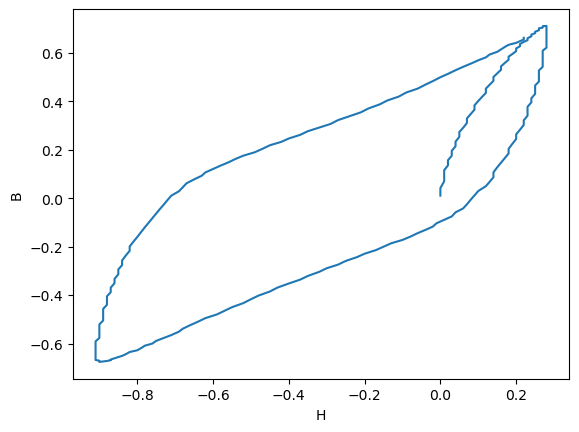

In [5]:
H,B=cargar("N1_Sin2.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

Text(0, 0.5, 'B')

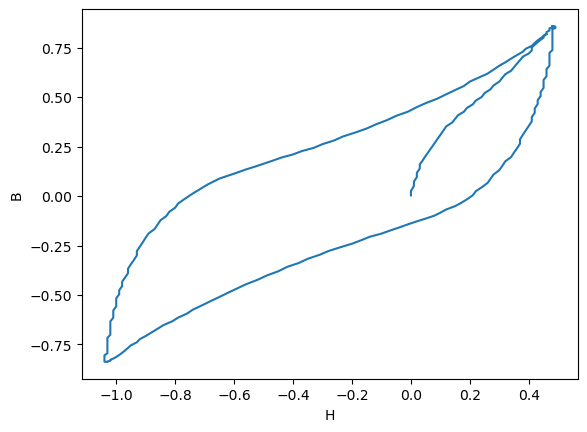

In [6]:
H,B=cargar("N2_Sin2.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

Text(0, 0.5, 'B')

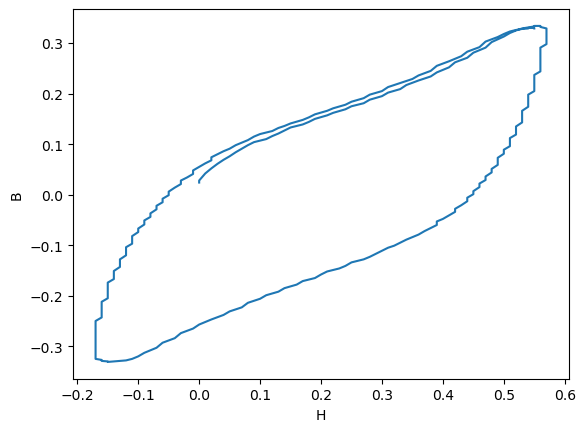

In [13]:
H,B=cargar("N2_Trian1.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

Text(0, 0.5, 'B')

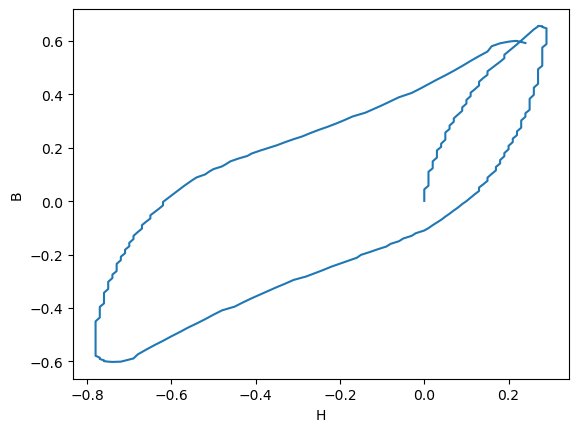

In [8]:
H,B=cargar("N1_Trian2.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

Text(0, 0.5, 'B')

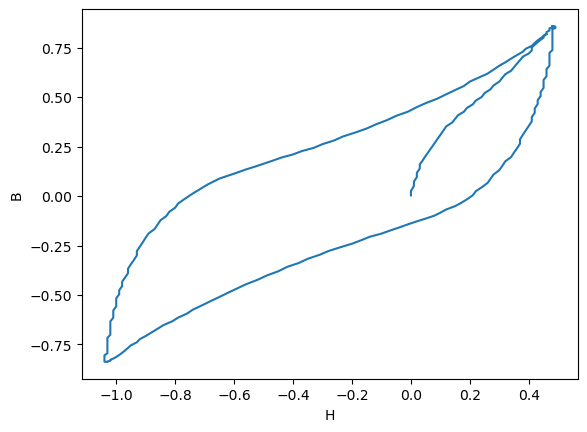

In [9]:
H,B=cargar("N2_Sin2.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

Text(0, 0.5, 'B')

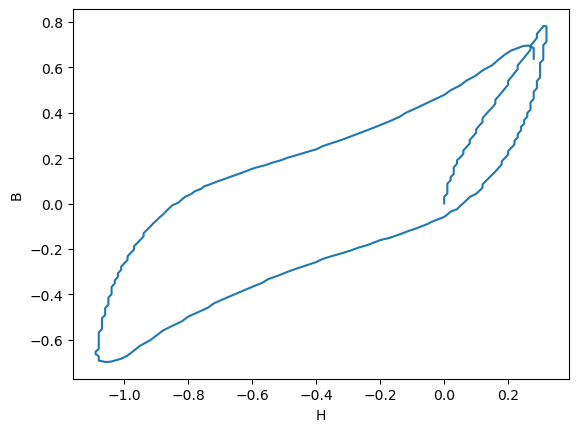

In [14]:
H,B=cargar("N2_Trian2.txt")
plt.plot(H,B)
plt.xlabel("H")
plt.ylabel("B")

# Termogenerador 

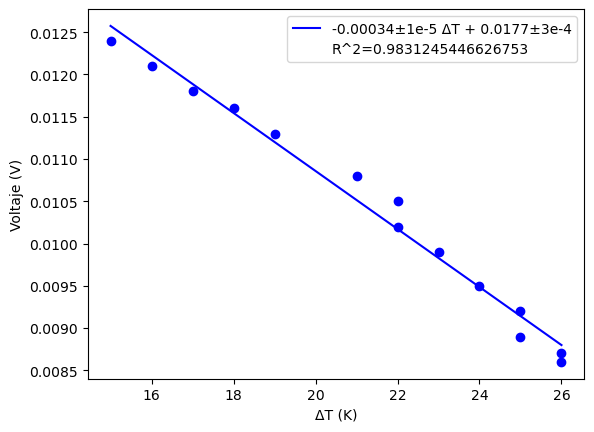

In [24]:
delT1=np.array((15,16,17, 18, 19,21, 22, 22, 23, 24,25,25, 26, 26))
V1=np.array((0.0124,0.0121,0.0118,0.0116,0.0113,0.0108,0.0105,0.0102,0.0099,0.0095,0.0092,0.0089,0.0086,0.0087))
I=np.array((0.1527,0.1586,0.185,0.1876,0.197,0.23,0.25,0.29,0.32,0.33,0.33,0.35,0.37,0.37))

RegT=Regresion(delT1,V1)

ys1=RegT[0]*delT1 +RegT[1]


plt.scatter(delT1,V1, color="blue")
plt.plot(delT1,ys1,color="blue", label= str(round(RegT[0],5))+"±1e-5 ΔT + "+str(round(RegT[1],4))+"±3e-4")
plt.scatter(16,0.009,label="R^2="+str(RegT[2]),color="white")
plt.xlabel("ΔT (K)")
plt.ylabel("Voltaje (V)")
plt.legend()

In [20]:
modelo = np.poly1d (np.polyfit (delT1,I, 2))
X=sym.Symbol("x",real=True)
np.array(modelo)
modelo[0],modelo[1],modelo[2],modelo
ec=lambda x:modelo[2]*x**2 + modelo[1]*x +modelo[0]
ecu=modelo[2]*X**2 + modelo[1]*X +modelo[0]
ecuaci=ec(X)
ecuaci

0.00080319178010502*x**2 - 0.012521713292203*x + 0.156222791949901

In [21]:
xs=np.linspace(14,26,1000)
ys2= ec(xs)


In [22]:
x_symb = sym.Symbol('x',real=True)

f=Interpolate(x_symb,delT1,I)
f_sym = sym.simplify(f)
#f
xs=np.linspace(12,26,1000)

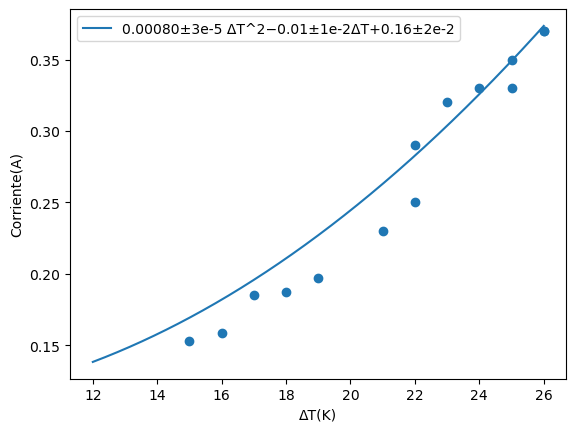

In [23]:
plt.scatter(delT1,I)
plt.plot(xs,ys2, label="0.00080±3e-5 ΔT^2−0.01±1e-2ΔT+0.16±2e-2")
plt.xlabel("ΔT(K)")
plt.ylabel("Corriente(A)")
plt.legend()

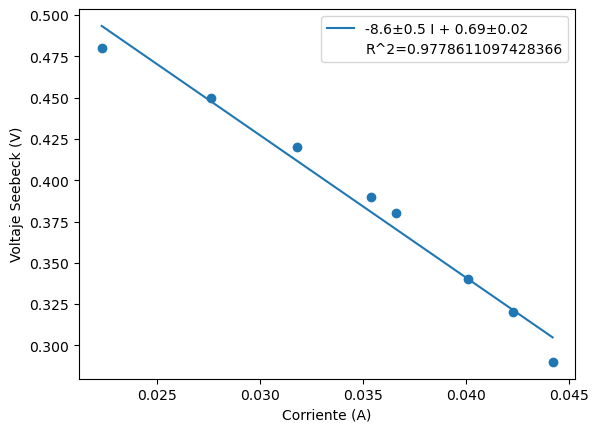

In [25]:
V2=np.array((0.48,0.45,0.42,0.39,0.38,0.34,0.32,0.29))
I2=np.array((0.0223,0.0276,0.0318,0.0354,0.0366,0.0401,0.0423,0.0442))

Reg2=Regresion(I2,V2)
ys3=Reg2[0]*I2+Reg2[1]

plt.scatter(I2,V2)
plt.plot(I2,ys3,label= str(round(Reg2[0],1))+"±0.5 I + "+str(round(Reg2[1],2))+"±0.02")
plt.scatter(0.025,0.300,label="R^2="+str(Reg2[2]),color="white")
plt.xlabel("Corriente (A)")
plt.ylabel("Voltaje Seebeck (V)")
plt.legend()

El valor de la resistencia corresponde a la pendiente de la gráfica V vs I. De esta se obtuvo un valor de $8.6\pm 0.5 \Omega$, que es bastante lejano a la resistencia medida con el multímetro ($17\Omega$)

Text(0, 0.5, 'Intensidad (µA)')

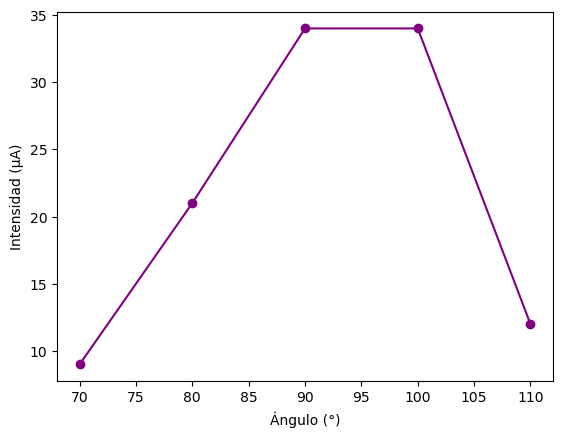

In [100]:
angulo=np.array((70,80,90,100,110))
inten=np.array((9,21,34,34,12))

plt.plot(angulo,inten,color="purple")
plt.scatter(angulo, inten, color="purple")
plt.xlabel("Ángulo (°)")
plt.ylabel("Intensidad (µA)")

Text(0, 0.5, 'Intensidad (µA)')

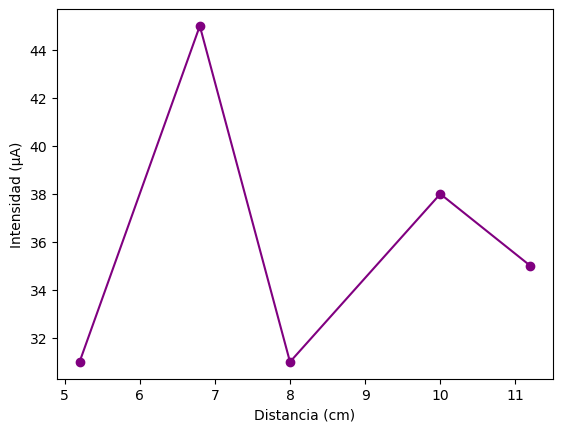

In [101]:
Intens=np.array((31,45,31,38,35))
Dist=np.array((5.2,6.8,8,10,11.2))

plt.plot(Dist,Intens,color="purple")
plt.scatter(Dist, Intens, color="purple")
plt.xlabel("Distancia (cm)")
plt.ylabel("Intensidad (µA)")

# Fotoconductividad


In [62]:
Angulo=np.array((0,10,20,30,40,50,60,70,80,90))
xs=np.linspace(0,90)
xs_chiqui=np.linspace(0,90,10)
xsl=np.linspace(0,0.2e-3)

I_20=np.array((0.2e-3,0.2e-3,0.18e-3,0.15e-3,0.12e-3,0.08e-3,0.04e-3,0.01e-3,0e-3,0e-3))

modelo_20 = np.poly1d (np.polyfit (Angulo,I_20, 3))
np.array(modelo_20)
ec_20=lambda x:modelo_20[3]*x**3+modelo_20[2]*x**2 + modelo_20[1]*x +modelo_20[0]
ys_20= ec_20(xs)
ysc_20=ec_20(xs_chiqui)

RegI20=Regresion(ysc_20,I_20)
ysI20=RegI20[0]*xsl + RegI20[1]


I_19=np.array((0.2e-3,0.19e-3,0.16e-3,0.15e-3,0.11e-3,0.08e-3,0.04e-3,0.01e-3,0,0))

modelo_19 = np.poly1d (np.polyfit (Angulo,I_19, 3))
np.array(modelo_19)
ec_19=(lambda x:modelo_19[3]*x**3+modelo_19[2]*x**2 + modelo_19[1]*x +modelo_19[0])
ys_19= ec_19(xs)
ysc_19=ec_19(xs_chiqui)
RegI19=Regresion(ysc_19,I_19)
ysI19=RegI19[0]*xsl + RegI19[1]


I_18=np.array((0.19e-3,0.18e-3,0.16e-3,0.14e-3,0.11e-3,0.08e-3,0.04e-3,0.01e-3,0,0))
modelo_18 = np.poly1d (np.polyfit (Angulo,I_18, 3))
np.array(modelo_18)
ec_18=(lambda x:
       modelo_18[3]*x**3+modelo_18[2]*x**2 + modelo_18[1]*x +modelo_18[0])
ys_18= ec_18(xs)
ysc_18=ec_18(xs_chiqui)
RegI18=Regresion(ysc_18,I_18)
ysI18=RegI18[0]*xsl + RegI18[1]

I_17=np.array((0.19e-3,0.18e-3,0.16e-3,0.13e-3,0.11e-3,0.07e-3,0.03e-3,0.01e-3,0,0))
modelo_17 = np.poly1d (np.polyfit (Angulo,I_17, 3))
np.array(modelo_17)
ec_17=(lambda x:
       modelo_17[3]*x**3+modelo_17[2]*x**2 + modelo_17[1]*x +modelo_17[0])
ys_17= ec_17(xs)
ysc_17=ec_17(xs_chiqui)
RegI17=Regresion(ysc_17,I_17)
ysI17=RegI17[0]*xsl + RegI17[1]


I_16=np.array((0.18e-3,0.17e-3,0.15e-3,0.12e-3,0.09e-3,0.06e-3,0.03e-3,0.01e-3,0,0))
modelo_16 = np.poly1d (np.polyfit (Angulo,I_16, 3))
np.array(modelo_16)
ec_16=(lambda x:
       modelo_16[3]*x**3+modelo_16[2]*x**2 + modelo_16[1]*x +modelo_16[0])
ys_16= ec_16(xs)
ysc_16=ec_16(xs_chiqui)
RegI16=Regresion(ysc_16,I_16)
ysI16=RegI16[0]*xsl + RegI16[1]

I_15=np.array((0.16e-3,0.16e-3,0.14e-3,0.11e-3,0.08e-3,0.06e-3,0.03e-3,0.01e-3,0,0))
modelo_15 = np.poly1d (np.polyfit (Angulo,I_15, 3))
np.array(modelo_15)
ec_15=(lambda x:
       modelo_15[3]*x**3+modelo_15[2]*x**2 + modelo_15[1]*x +modelo_15[0])
ys_15= ec_15(xs)
ysc_15=ec_15(xs_chiqui)
RegI15=Regresion(ysc_15,I_15)
ysI15=RegI15[0]*xsl + RegI15[1]


I_14=np.array((0.17e-3,0.17e-3,0.15e-3,0.12e-3,0.09e-3,0.06e-3,0.03e-3,0.01e-3,0,0))
modelo_14 = np.poly1d (np.polyfit (Angulo,I_14, 3))
np.array(modelo_14)
ec_14=(lambda x:
       modelo_14[3]*x**3+modelo_14[2]*x**2 + modelo_14[1]*x +modelo_14[0])
ys_14= ec_14(xs)
ysc_14=ec_14(xs_chiqui)
RegI14=Regresion(ysc_14,I_14)
ysI14=RegI14[0]*xsl + RegI14[1]

I_13=np.array((0.16e-3,0.16e-3,0.14e-3,0.12e-3,0.10e-3,0.07e-3,0.04e-3,0.01e-3,0.0,0))
modelo_13 = np.poly1d (np.polyfit (Angulo,I_13, 3))
np.array(modelo_13)
ec_13=(lambda x:
       modelo_13[3]*x**3+modelo_13[2]*x**2 + modelo_13[1]*x +modelo_13[0])
ys_13= ec_13(xs)
ysc_13=ec_13(xs_chiqui)
RegI13=Regresion(ysc_13,I_13)
ysI13=RegI13[0]*xsl + RegI13[1]


I_12=np.array((0.15e-3,0.15e-3,0.13e-3,0.10e-3,0.08e-3,0.06e-3,0.03e-3,0.01e-3,0,0))
modelo_12 = np.poly1d (np.polyfit (Angulo,I_12, 3))
np.array(modelo_12)
ec_12=(lambda x:
       modelo_12[3]*x**3+modelo_12[2]*x**2 + modelo_12[1]*x +modelo_12[0])
ys_12= ec_12(xs)
ysc_12=ec_12(xs_chiqui)
RegI12=Regresion(ysc_12,I_12)
ysI12=RegI12[0]*xsl + RegI12[1]


I_11=np.array((0.14e-3,0.13e-3,0.12e-3,0.09e-3,0.07e-3,0.04e-3,0.02e-3,0,0,0))
modelo_11 = np.poly1d (np.polyfit (Angulo,I_11, 3))
np.array(modelo_11)
ec_11=(lambda x:
       modelo_11[3]*x**3+modelo_11[2]*x**2 + modelo_11[1]*x +modelo_11[0])
ys_11= ec_11(xs)
ysc_11=ec_11(xs_chiqui)
RegI11=Regresion(ysc_11,I_11)
ysI11=RegI11[0]*xsl + RegI11[1]


I_10=np.array((0.12e-3,0.12e-3,0.10e-3,0.09e-3,0.07e-3,0.05e-3,0.02e-3,0,0,0))
modelo_10 = np.poly1d (np.polyfit (Angulo,I_10, 3))
np.array(modelo_10)
ec_10=(lambda x:
       modelo_10[3]*x**3+modelo_10[2]*x**2 + modelo_10[1]*x +modelo_10[0])
ys_10= ec_10(xs)
ysc_10=ec_10(xs_chiqui)
RegI10=Regresion(ysc_10,I_10)
ysI10=RegI10[0]*xsl + RegI10[1]


I_9=np.array((0.11e-3,0.11e-3,0.09e-3,0.08e-3,0.06e-3,0.04e-3,0.02e-3,0,0,0))
modelo_9 = np.poly1d (np.polyfit (Angulo,I_9, 3))
np.array(modelo_9)
ec_9=(lambda x:
       modelo_9[3]*x**3+modelo_9[2]*x**2 + modelo_9[1]*x +modelo_9[0])
ys_9= ec_9(xs)
ysc_9=ec_9(xs_chiqui)
RegI9=Regresion(ysc_9,I_9)
ysI9=RegI9[0]*xsl + RegI9[1]


I_8=np.array((0.10e-3,0.10e-3,0.08e-3,0.07e-3,0.05e-3,0.03e-3,0.01e-3,0,0,0))
modelo_8 = np.poly1d (np.polyfit (Angulo,I_8,3))
np.array(modelo_8)
ec_8=(lambda x:
       modelo_8[3]*x**3+modelo_8[2]*x**2 + modelo_8[1]*x +modelo_8[0])
ys_8= ec_8(xs)
ysc_8=ec_8(xs_chiqui)
RegI8=Regresion(ysc_8,I_8)
ysI8=RegI8[0]*xsl + RegI8[1]


I_7=np.array((0.09e-3,0.08e-3,0.07e-3,0.05e-3,0.04e-3,0.02e-3,0.01e-3,0,0,0))
modelo_7 = np.poly1d (np.polyfit (Angulo,I_7, 3))
np.array(modelo_7)
ec_7=(lambda x:
       modelo_7[3]*x**3+modelo_7[2]*x**2 + modelo_7[1]*x +modelo_7[0])
ys_7= ec_7(xs)
ysc_7=ec_7(xs_chiqui)
RegI7=Regresion(ysc_7,I_7)
ysI7=RegI7[0]*xsl + RegI7[1]


I_6=np.array((0.07e-3,0.07e-3,0.06e-3,0.05e-3,0.04e-3,0.03e-3,0.02e-3,0.01e-3,0,0))
modelo_6 = np.poly1d (np.polyfit (Angulo,I_6, 3))
np.array(modelo_6)
ec_6=(lambda x:
       modelo_6[3]*x**3+modelo_6[2]*x**2 + modelo_6[1]*x +modelo_6[0])
ys_6= ec_6(xs)
ysc_6=ec_6(xs_chiqui)
RegI6=Regresion(ysc_6,I_6)
ysI6=RegI6[0]*xsl + RegI6[1]


I_5=np.array((0.06e-3,0.05e-3,0.05e-3,0.04e-3,0.04e-3,0.03e-3,0.02e-3,0.01e-3,0,0))
modelo_5 = np.poly1d (np.polyfit (Angulo,I_5, 3))
np.array(modelo_5)
ec_5=(lambda x:
       modelo_5[3]*x**3+modelo_5[2]*x**2 + modelo_5[1]*x +modelo_5[0])
ys_5= ec_5(xs)
ysc_5=ec_5(xs_chiqui)
RegI5=Regresion(ysc_5,I_5)
ysI5=RegI5[0]*xsl + RegI5[1]


I_4=np.array((0.05e-3,0.04e-3,0.04e-3,0.03e-3,0.03e-3,0.02e-3,0.01e-3,0.01e-3,0,0))
modelo_4 = np.poly1d (np.polyfit (Angulo,I_4, 3))
np.array(modelo_4)
ec_4=(lambda x:
       modelo_4[3]*x**3+modelo_4[2]*x**2 + modelo_4[1]*x +modelo_4[0])
ys_4= ec_4(xs)
ysc_4=ec_4(xs_chiqui)
RegI4=Regresion(ysc_4,I_4)
ysI4=RegI4[0]*xsl + RegI4[1]


I_3=np.array((0.04e-3,0.03e-3,0.03e-3,0.03e-3,0.02e-3,0.02e-3,0.01e-3,0,0,0))
modelo_3 = np.poly1d (np.polyfit (Angulo,I_3, 3))
np.array(modelo_3)
ec_3=(lambda x:
       modelo_3[3]*x**3+modelo_3[2]*x**2 + modelo_3[1]*x +modelo_3[0])
ys_3= ec_3(xs)
ysc_3=ec_3(xs_chiqui)
RegI3=Regresion(ysc_3,I_3)
ysI3=RegI3[0]*xsl + RegI3[1]


I_2=np.array((0.02e-3,0.02e-3,0.02e-3,0.02e-3,0.01e-3,0.01e-3,0.01e-3,0,0,0))
modelo_2 = np.poly1d (np.polyfit (Angulo,I_2, 3))
np.array(modelo_2)
ec_2=(lambda x:
       modelo_2[3]*x**3+modelo_2[2]*x**2 + modelo_2[1]*x +modelo_2[0])
ys_2= ec_2(xs)
ysc_2=ec_2(xs_chiqui)
RegI2=Regresion(ysc_2,I_2)
ysI2=RegI2[0]*xsl + RegI2[1]


I_1=np.array((0.01e-3,0.01e-3,0.01e-3,0.01e-3,0.01e-3,0.01e-3,0,0,0,0))
modelo_1 = np.poly1d (np.polyfit (Angulo,I_1, 3))
np.array(modelo_1)
ec_1=(lambda x:
       modelo_1[3]*x**3+modelo_1[2]*x**2 + modelo_1[1]*x +modelo_1[0])
ys_1= ec_1(xs)
ysc_1=ec_1(xs_chiqui)
RegI1=Regresion(ysc_1,I_1)
ysI1=RegI1[0]*xsl + RegI1[1]

len(xs_chiqui),len(ysc_20)


(10, 10)

In [26]:
I_20=np.array((0.2,0.2,0.18,0.15,0.12,0.08,0.04,0.01,0,0))

modelo_20 = np.poly1d (np.polyfit (Angulo,I_20, 6))
np.array(modelo_20)
ec_20=lambda x:modelo_20[6]*x**6+modelo_20[5]*x**5+modelo_20[4]*x**4+modelo_20[3]*x**3+modelo_20[2]*x**2 + modelo_20[1]*x +modelo_20[0]


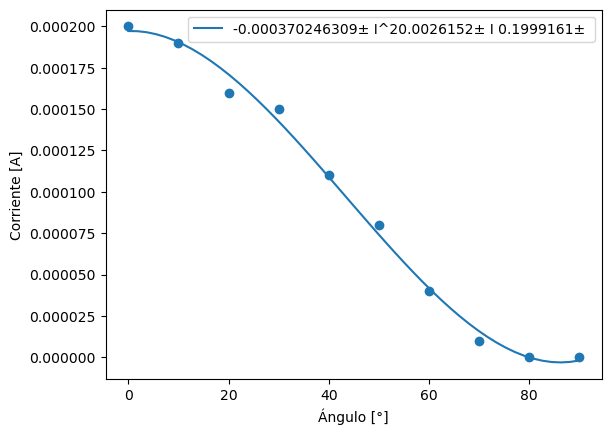

In [27]:

ys_20= ec_20(xs)

plt.scatter(Angulo,I_19)
plt.plot(xs,ys_19, label=str(round(modelo_20[2],12))+"± I^2"+str(round(modelo_20[1],7))+"± I "+str(round(modelo_20[0],7))+"± ")
plt.xlabel("Ángulo [°]")
plt.ylabel("Corriente [A]")
plt.legend()

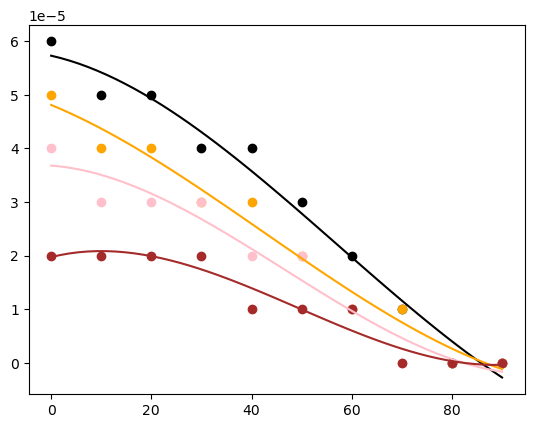

In [31]:
plt.scatter(Angulo,I_5,color="black")
plt.plot(xs,ys_5,color="black",label="5V: "+str(round(modelo_5[3],8))+"±4e-8 θ^3 "
         +str(round(modelo_5[2],6))+"±3e-6 θ^2 +")
plt.scatter(Angulo,I_4,color="orange")
plt.plot(xs,ys_4,color="orange",label="4V: "+str(round(modelo_4[3],8))+"±5e-8 θ^3 "
         +str(round(modelo_4[2],6))+"±5e-6 θ^2 +")
plt.scatter(Angulo,I_3,color="pink")
plt.plot(xs,ys_3,color="pink",label="3V: "+str(round(modelo_3[3],8))+"±6e-6 θ^3 "
         +str(round(modelo_3[2],6))+"±6e-6 θ^2 +")
plt.scatter(Angulo,I_2,color="brown")
plt.plot(xs,ys_2,color="brown",label="2V: "+str(round(modelo_2[3],8))+"±4e-8 θ^3 "
         +str(round(modelo_2[2],6))+"±8e-6 θ^2 +")


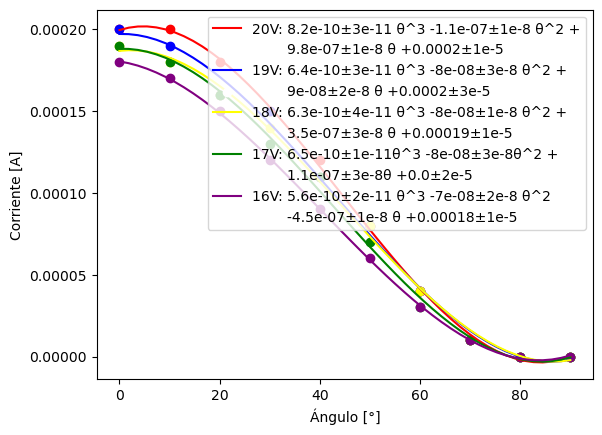

In [48]:
plt.scatter(Angulo,I_20,color="red")
plt.plot(xs,ys_20,color="red",label="20V: "+str(round(modelo_20[3],11))+"±3e-11 θ^3 "
         +str(round(modelo_20[2],8))+"±1e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_20[1],8))+"±1e-8 θ +"+str(round(modelo_20[0],5))+"±1e-5")
plt.scatter(Angulo,I_19,color="blue")
plt.plot(xs,ys_19,color="blue",label="19V: "+str(round(modelo_19[3],11))+"±3e-11 θ^3 "
         +str(round(modelo_19[2],8))+"±3e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_19[1],8))+"±2e-8 θ +"+str(round(modelo_19[0],5))+"±3e-5")
plt.scatter(Angulo,I_18,color="yellow")
plt.plot(xs,ys_18,color="yellow",label="18V: "+str(round(modelo_18[3],11))+"±4e-11 θ^3 "
         +str(round(modelo_18[2],8))+"±1e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_18[1],8))+"±3e-8 θ +"+str(round(modelo_18[0],5))+"±1e-5")
plt.scatter(Angulo,I_17,color="green")
plt.plot(xs,ys_17,color="green",label="17V: "+str(round(modelo_17[3],11))+"±1e-11θ^3 "
         +str(round(modelo_17[2],8))+"±3e-8θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_17[1],8))+"±3e-8θ +"+str(round(modelo_17[0],2))+"±2e-5")
plt.scatter(Angulo,I_16,color="purple")
plt.plot(xs,ys_16,color="purple",label="16V: "+str(round(modelo_16[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_16[2],8))+"±2e-8 θ^2 ")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_16[1],8))+"±1e-8 θ +"+str(round(modelo_16[0],5))+"±1e-5")

plt.xlabel("Ángulo [°]")
plt.ylabel("Corriente [A]")
plt.legend()


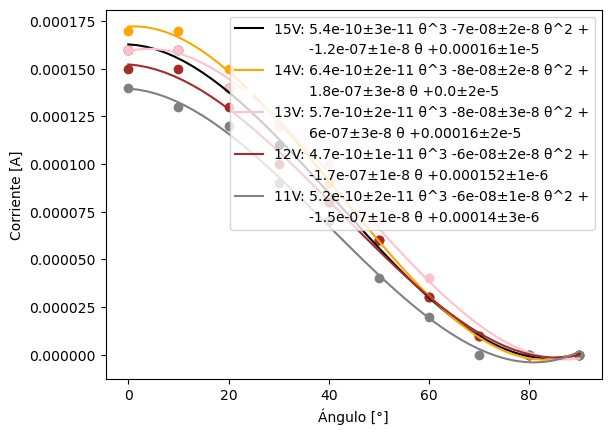

In [49]:
plt.scatter(Angulo,I_15,color="black")
plt.plot(xs,ys_15,color="black",label="15V: "+str(round(modelo_15[3],11))+"±3e-11 θ^3 "
         +str(round(modelo_15[2],8))+"±2e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_15[1],8))+"±1e-8 θ +"+str(round(modelo_15[0],5))+"±1e-5")
plt.scatter(Angulo,I_14,color="orange")
plt.plot(xs,ys_14,color="orange",label="14V: "+str(round(modelo_14[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_14[2],8))+"±2e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_14[1],8))+"±3e-8 θ +"+str(round(modelo_14[0],2))+"±2e-5")
plt.scatter(Angulo,I_13,color="pink")
plt.plot(xs,ys_13,color="pink",label="13V: "+str(round(modelo_13[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_13[2],8))+"±3e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_13[1],8))+"±3e-8 θ +"+str(round(modelo_13[0],5))+"±2e-5")
plt.scatter(Angulo,I_12,color="brown")
plt.plot(xs,ys_12,color="brown",label="12V: "+str(round(modelo_12[3],11))+"±1e-11 θ^3 "
         +str(round(modelo_12[2],8))+"±2e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_12[1],8))+"±1e-8 θ +"+str(round(modelo_12[0],6))+"±1e-6")
plt.scatter(Angulo,I_11,color="grey")
plt.plot(xs,ys_11,color="grey",label="11V: "+str(round(modelo_11[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_11[2],8))+"±1e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_11[1],8))+"±1e-8 θ +"+str(round(modelo_11[0],6))+"±3e-6")

plt.xlabel("Ángulo [°]")
plt.ylabel("Corriente [A]")
plt.legend()


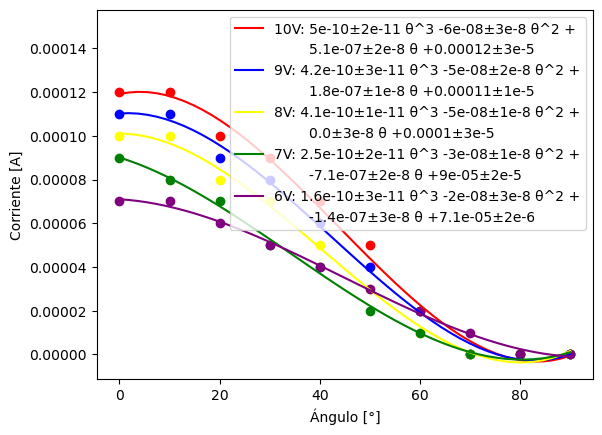

In [50]:
plt.scatter(Angulo,I_10,color="red")
plt.plot(xs,ys_10,color="red",label="10V: "+str(round(modelo_10[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_10[2],8))+"±3e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_10[1],8))+"±2e-8 θ +"+str(round(modelo_10[0],5))+"±3e-5")
plt.scatter(Angulo,I_9,color="blue")
plt.plot(xs,ys_9,color="blue",label="9V: "+str(round(modelo_9[3],11))+"±3e-11 θ^3 "
         +str(round(modelo_9[2],8))+"±2e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_9[1],8))+"±1e-8 θ +"+str(round(modelo_9[0],5))+"±1e-5")
plt.scatter(Angulo,I_8,color="yellow")
plt.plot(xs,ys_8,color="yellow",label="8V: "+str(round(modelo_8[3],11))+"±1e-11 θ^3 "
         +str(round(modelo_8[2],8))+"±1e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_8[1],8))+"±3e-8 θ +"+str(round(modelo_8[0],5))+"±3e-5")
plt.scatter(Angulo,I_7,color="green")
plt.plot(xs,ys_7,color="green",label="7V: "+str(round(modelo_7[3],11))+"±2e-11 θ^3 "
         +str(round(modelo_7[2],8))+"±1e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_7[1],8))+"±2e-8 θ +"+str(round(modelo_7[0],5))+"±2e-5")
plt.scatter(Angulo,I_6,color="purple")
plt.plot(xs,ys_6,color="purple",label="6V: "+str(round(modelo_6[3],11))+"±3e-11 θ^3 "
         +str(round(modelo_6[2],8))+"±3e-8 θ^2 +")
plt.scatter(60,0.00015,color="white",label="        "+str(round(modelo_6[1],8))+"±3e-8 θ +"+str(round(modelo_6[0],6))+"±2e-6")

plt.xlabel("Ángulo [°]")
plt.ylabel("Corriente [A]")
plt.legend()

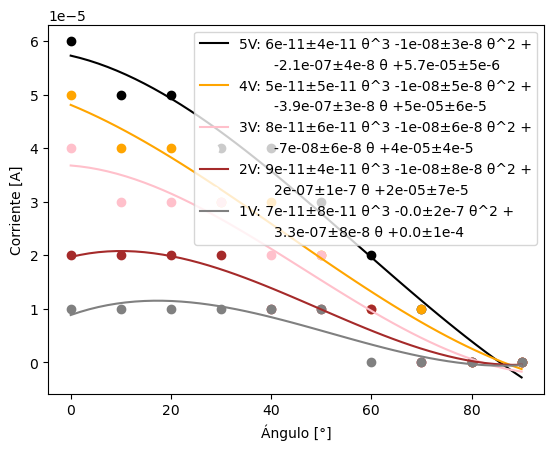

In [51]:
plt.scatter(Angulo,I_5,color="black")
plt.plot(xs,ys_5,color="black",label="5V: "+str(round(modelo_5[3],11))+"±4e-11 θ^3 "
         +str(round(modelo_5[2],8))+"±3e-8 θ^2 +")
plt.scatter(60,0.000015,color="white",label="        "+str(round(modelo_5[1],8))+"±4e-8 θ +"+str(round(modelo_5[0],6))+"±5e-6")
plt.scatter(Angulo,I_4,color="orange")
plt.plot(xs,ys_4,color="orange",label="4V: "+str(round(modelo_4[3],11))+"±5e-11 θ^3 "
         +str(round(modelo_4[2],8))+"±5e-8 θ^2 +")
plt.scatter(60,0.000015,color="white",label="        "+str(round(modelo_4[1],8))+"±3e-8 θ +"+str(round(modelo_4[0],5))+"±6e-5")
plt.scatter(Angulo,I_3,color="pink")
plt.plot(xs,ys_3,color="pink",label="3V: "+str(round(modelo_3[3],11))+"±6e-11 θ^3 "
         +str(round(modelo_3[2],8))+"±6e-8 θ^2 +")
plt.scatter(60,0.000015,color="white",label="        "+str(round(modelo_3[1],8))+"±6e-8 θ +"+str(round(modelo_3[0],5))+"±4e-5")
plt.scatter(Angulo,I_2,color="brown")
plt.plot(xs,ys_2,color="brown",label="2V: "+str(round(modelo_2[3],11))+"±4e-11 θ^3 "
         +str(round(modelo_2[2],8))+"±8e-8 θ^2 +")
plt.scatter(60,0.000015,color="white",label="        "+str(round(modelo_2[1],7))+"±1e-7 θ +"+str(round(modelo_2[0],5))+"±7e-5")
plt.scatter(Angulo,I_1,color="grey")
plt.plot(xs,ys_1,color="grey",label="1V: "+str(round(modelo_1[3],11))+"±8e-11 θ^3 "
         +str(round(modelo_1[2],7))+"±2e-7 θ^2 +")
plt.scatter(60,0.000015,color="white",label="        "+str(round(modelo_1[1],8))+"±8e-8 θ +"+str(round(modelo_1[0],4))+"±1e-4")

plt.xlabel("Ángulo [°]")
plt.ylabel("Corriente [A]")
plt.legend()

In [59]:
ysc_20,I_20,xsl

(array([ 1.99608392e-04,  1.99282051e-04,  1.81962704e-04,  1.52592075e-04,
         1.16111888e-04,  7.74638695e-05,  4.15897436e-05,  1.34312354e-05,
        -2.06993007e-06,  2.79720280e-08]),
 array([2.0e-04, 2.0e-04, 1.8e-04, 1.5e-04, 1.2e-04, 8.0e-05, 4.0e-05,
        1.0e-05, 0.0e+00, 0.0e+00]),
 array([0.        , 0.00408163, 0.00816327, 0.0122449 , 0.01632653,
        0.02040816, 0.0244898 , 0.02857143, 0.03265306, 0.03673469,
        0.04081633, 0.04489796, 0.04897959, 0.05306122, 0.05714286,
        0.06122449, 0.06530612, 0.06938776, 0.07346939, 0.07755102,
        0.08163265, 0.08571429, 0.08979592, 0.09387755, 0.09795918,
        0.10204082, 0.10612245, 0.11020408, 0.11428571, 0.11836735,
        0.12244898, 0.12653061, 0.13061224, 0.13469388, 0.13877551,
        0.14285714, 0.14693878, 0.15102041, 0.15510204, 0.15918367,
        0.16326531, 0.16734694, 0.17142857, 0.1755102 , 0.17959184,
        0.18367347, 0.1877551 , 0.19183673, 0.19591837, 0.2       ]))

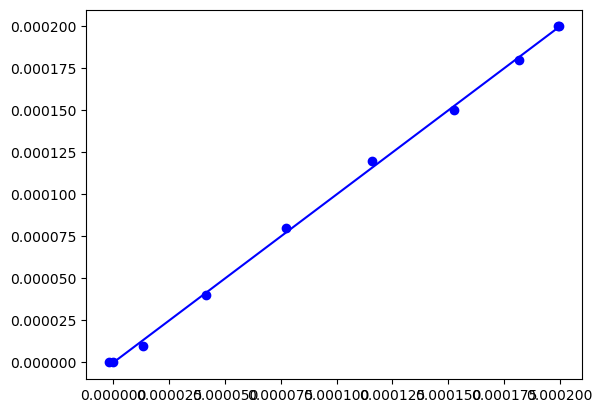

In [63]:
plt.scatter(ysc_20,I_20,color="blue")
plt.plot(xsl,ysI20,color="blue",label="20V: "+str(round(RegI20[0],1))+"±2e-1 I + "+str(round(RegI20[1],20))+"±1e-16")

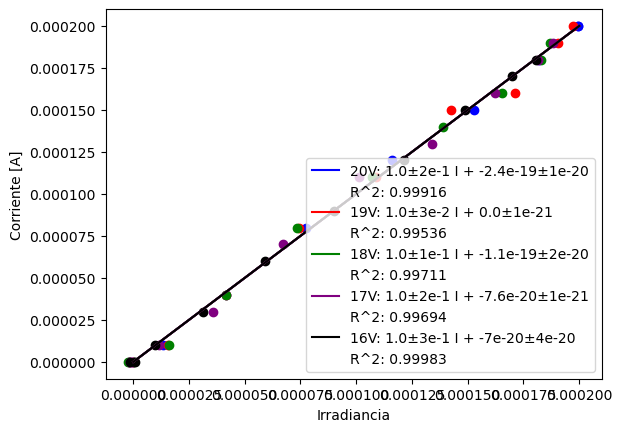

In [85]:
plt.scatter(ysc_20,I_20,color="blue")
plt.plot(xsl,ysI20,color="blue",label="20V: "+str(round(RegI20[0],1))+"±2e-1 I + "+str(round(RegI20[1],20))+"±1e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI20[2],5)),color="white")
plt.scatter(ysc_19,I_19,color="red")
plt.plot(xsl,ysI19,color="red",label="19V: "+str(round(RegI19[0],2))+"±3e-2 I + "+str(RegI19[1])+"±1e-21")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI19[2],5)),color="white")
plt.scatter(ysc_18,I_18,color="green")
plt.plot(xsl,ysI18,color="green",label="18V: "+str(round(RegI18[0],1))+"±1e-1 I + "+str(round(RegI18[1],20))+"±2e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI18[2],5)),color="white")
plt.scatter(ysc_17,I_17,color="purple")
plt.plot(xsl,ysI17,color="purple",label="17V: "+str(round(RegI17[0],1))+"±2e-1 I + "+str(round(RegI17[1],21))+"±1e-21")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI17[2],5)),color="white")
plt.scatter(ysc_16,I_16,color="black")
plt.plot(xsl,ysI16,color="black",label="16V: "+str(round(RegI16[0],1))+"±3e-1 I + "+str(round(RegI16[1],20))+"±4e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI16[2],5)),color="white")

plt.xlabel("Irradiancia")
plt.ylabel("Corriente [A]")
plt.legend()


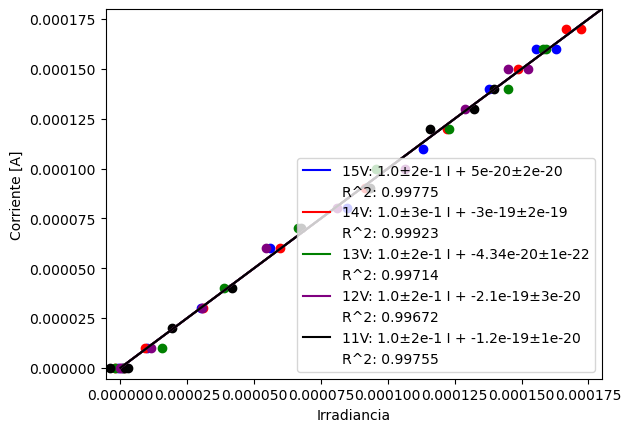

In [86]:
plt.scatter(ysc_15,I_15,color="blue")
plt.plot(xsl,ysI15,color="blue",label="15V: "+str(round(RegI15[0],1))+"±2e-1 I + "+str(round(RegI15[1],20))+"±2e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI15[2],5)),color="white")
plt.scatter(ysc_14,I_14,color="red")
plt.plot(xsl,ysI14,color="red",label="14V: "+str(round(RegI14[0],1))+"±3e-1 I + "+str(round(RegI14[1],19))+"±2e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI14[2],5)),color="white")
plt.scatter(ysc_13,I_13,color="green")
plt.plot(xsl,ysI13,color="green",label="13V: "+str(round(RegI13[0],1))+"±2e-1 I + "+str(round(RegI13[1],22))+"±1e-22")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI13[2],5)),color="white")
plt.scatter(ysc_12,I_12,color="purple")
plt.plot(xsl,ysI12,color="purple",label="12V: "+str(round(RegI12[0],1))+"±2e-1 I + "+str(round(RegI12[1],20))+"±3e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI12[2],5)),color="white")
plt.scatter(ysc_11,I_11,color="black")
plt.plot(xsl,ysI11,color="black",label="11V: "+str(round(RegI11[0],1))+"±2e-1 I + "+str(round(RegI11[1],20))+"±1e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI11[2],5)),color="white")

plt.xlabel("Irradiancia")
plt.ylabel("Corriente [A]")
plt.ylim(-0.0000055,0.00018)
plt.xlim(-0.0000055,0.00018)
plt.legend()

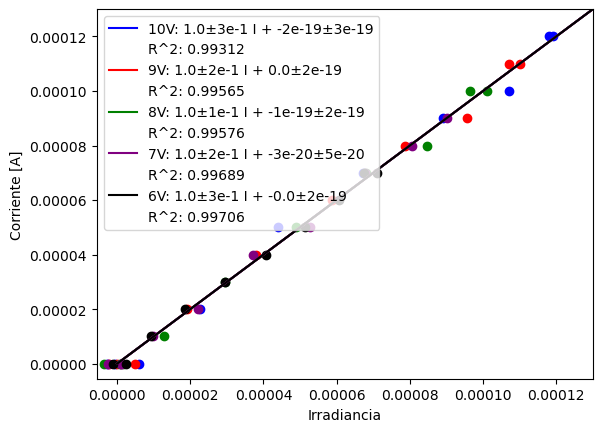

In [89]:
plt.scatter(ysc_10,I_10,color="blue")
plt.plot(xsl,ysI10,color="blue",label="10V: "+str(round(RegI10[0],1))+"±3e-1 I + "+str(round(RegI10[1],19))+"±3e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI10[2],5)),color="white")
plt.scatter(ysc_9,I_9,color="red")
plt.plot(xsl,ysI9,color="red",label="9V: "+str(round(RegI9[0],1))+"±2e-1 I + "+str(round(RegI9[1],19))+"±2e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI9[2],5)),color="white")
plt.scatter(ysc_8,I_8,color="green")
plt.plot(xsl,ysI8,color="green",label="8V: "+str(round(RegI8[0],1))+"±1e-1 I + "+str(round(RegI8[1],19))+"±2e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI8[2],5)),color="white")
plt.scatter(ysc_7,I_7,color="purple")
plt.plot(xsl,ysI7,color="purple",label="7V: "+str(round(RegI7[0],1))+"±2e-1 I + "+str(round(RegI7[1],20))+"±5e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI7[2],5)),color="white")
plt.scatter(ysc_6,I_6,color="black")
plt.plot(xsl,ysI6,color="black",label="6V: "+str(round(RegI6[0],1))+"±3e-1 I + "+str(round(RegI6[1],19))+"±2e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI6[2],5)),color="white")

plt.xlabel("Irradiancia")
plt.ylabel("Corriente [A]")
plt.ylim(-0.0000055,0.00013)
plt.xlim(-0.0000055,0.00013)
plt.legend()

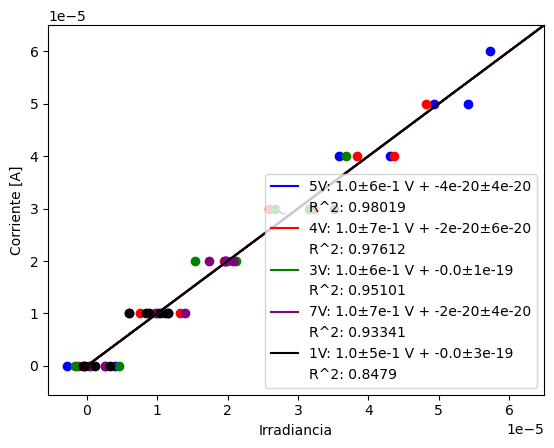

In [90]:
plt.scatter(ysc_5,I_5,color="blue")
plt.plot(xsl,ysI5,color="blue",label="5V: "+str(round(RegI5[0],1))+"±6e-1 V + "+str(round(RegI5[1],20))+"±4e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI5[2],5)),color="white")
plt.scatter(ysc_4,I_4,color="red")
plt.plot(xsl,ysI4,color="red",label="4V: "+str(round(RegI4[0],1))+"±7e-1 V + "+str(round(RegI4[1],20))+"±6e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI4[2],5)),color="white")
plt.scatter(ysc_3,I_3,color="green")
plt.plot(xsl,ysI3,color="green",label="3V: "+str(round(RegI3[0],1))+"±6e-1 V + "+str(round(RegI3[1],19))+"±1e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI3[2],5)),color="white")
plt.scatter(ysc_2,I_2,color="purple")
plt.plot(xsl,ysI2,color="purple",label="7V: "+str(round(RegI2[0],1))+"±7e-1 V + "+str(round(RegI2[1],20))+"±4e-20")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI2[2],5)),color="white")
plt.scatter(ysc_1,I_1,color="black")
plt.plot(xsl,ysI1,color="black",label="1V: "+str(round(RegI1[0],1))+"±5e-1 V + "+str(round(RegI1[1],19))+"±3e-19")
plt.scatter(0.0001,0.0002,label="R^2: "+str(round(RegI1[2],5)),color="white")

plt.xlabel("Irradiancia")
plt.ylabel("Corriente [A]")
plt.ylim(-0.0000055,0.000065)
plt.xlim(-0.0000055,0.000065)
plt.legend()

In [93]:
Voltajes=np.array((20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1))
xs=np.linspace(20,1)
Ang_0=np.array((0.2,0.2,0.19,0.19,0.18,0.16,0.17,0.16,0.15,0.14,0.12,0.11,0.10,0.09,0.07,0.06,0.05,0.04,0.02,0.01))

Reg0=Regresion(Voltajes,Ang_0)
ys0=Reg0[0]*xs + Reg0[1]
RegR0=Regresion(Ang_0,Voltajes)


Ang_10=np.array((0.2,0.19,0.18,0.18,0.17,0.16,0.17,0.16,0.15,0.13,0.12,0.11,0.10,0.08,0.07,0.05,0.04,0.03,0.02,0.01))
Reg10=Regresion(Voltajes,Ang_10)
ys10=Reg10[0]*xs + Reg10[1]
RegR10=Regresion(Ang_10,Voltajes)


Ang_20=np.array((0.18,0.16,0.16,0.16,0.17,0.14,0.15,0.14,0.13,0.12,0.10,0.11,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01))
Reg20=Regresion(Voltajes,Ang_20)
ys20=Reg20[0]*xs + Reg20[1]
RegR20=Regresion(Ang_20,Voltajes)


Ang_30=np.array((0.15,0.15,0.14,0.13,0.12,0.11,0.12,0.12,0.1,0.09,0.09,0.08,0.07,0.05,0.05,0.04,0.03,0.03,0.02,0.01))
Reg30=Regresion(Voltajes,Ang_30)
ys30=Reg30[0]*xs + Reg30[1]
RegR30=Regresion(Ang_30,Voltajes)

Ang_40=np.array((0.12,0.11,0.11,0.11,0.09,0.08,0.09,0.1,0.08,0.07,0.07,0.06,0.05,0.04,0.04,0.04,0.03,0.02,0.01,0.01))
Reg40=Regresion(Voltajes,Ang_40)
ys40=Reg40[0]*xs + Reg40[1]
RegR40=Regresion(Ang_40,Voltajes)


Ang_50=np.array((0.08,0.08,0.08,0.07,0.06,0.06,0.06,0.07,0.06,0.04,0.05,0.04,0.03,0.02,0.03,0.03,0.02,0.02,0.01,0.01))
Reg50=Regresion(Voltajes,Ang_50)
ys50=Reg50[0]*xs + Reg50[1]
RegR50=Regresion(Ang_50,Voltajes)


Ang_60=np.array((0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.04,0.03,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0))
Reg60=Regresion(Voltajes,Ang_60)
ys60=Reg60[0]*xs + Reg60[1]
RegR60=Regresion(Ang_60,Voltajes)

Ang_70=np.array((0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0,0,0,0,0,0.01,0.01,0.01,0,0,0))
Reg70=Regresion(Voltajes,Ang_70)
ys70=Reg70[0]*xs + Reg70[1]
RegR70=Regresion(Ang_70,Voltajes)

In [98]:
RegR0[0],Reg0[0], RegR10[0],Reg10[0],RegR20[0],Reg20[0],RegR30[0],Reg30[0],RegR40[0],Reg40[0],RegR50[0],Reg50[0],RegR60[0],Reg60[0],RegR70[0],Reg70[0]

(93.59605911330038,
 0.010428571428571426,
 93.63091997822525,
 0.010345864661654144,
 105.6215083798882,
 0.009097744360902263,
 129.71576227390167,
 0.007548872180451127,
 165.20997655084201,
 0.005827067669172932,
 238.97058823529392,
 0.003909774436090225,
 443.2624113475181,
 0.0018796992481203006,
 687.4999999999994,
 0.0004962406015037591)

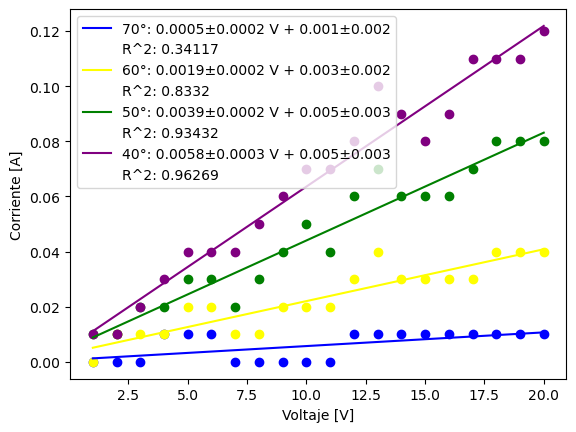

In [99]:
plt.scatter(Voltajes,Ang_70,color="blue")
plt.plot(xs,ys70,color="blue",label="70°: "+str(round(Reg70[0],4))+"±0.0002 V + "+str(round(Reg70[1],3))+"±0.002")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg70[2],5)),color="white")
plt.scatter(Voltajes,Ang_60,color="yellow")
plt.plot(xs,ys60,color="yellow",label="60°: "+str(round(Reg60[0],4))+"±0.0002 V + "+str(round(Reg60[1],3))+"±0.002")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg60[2],5)),color="white")
plt.scatter(Voltajes,Ang_50,color="green")
plt.plot(xs,ys50,color="green",label="50°: "+str(round(Reg50[0],4))+"±0.0002 V + "+str(round(Reg50[1],3))+"±0.003")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg50[2],5)),color="white")
plt.scatter(Voltajes,Ang_40,color="purple")
plt.plot(xs,ys40,color="purple",label="40°: "+str(round(Reg40[0],4))+"±0.0003 V + "+str(round(Reg40[1],3))+"±0.003")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg40[2],5)),color="white")


plt.xlabel("Voltaje [V]")
plt.ylabel("Corriente [A]")
plt.legend()

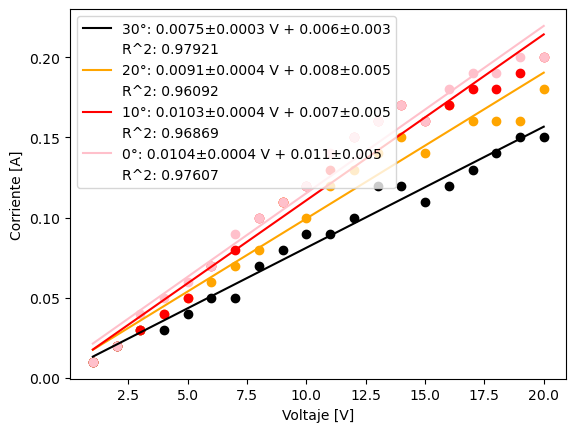

In [178]:
plt.scatter(Voltajes,Ang_30,color="black")
plt.plot(xs,ys30,color="black",label="30°: "+str(round(Reg30[0],4))+"±0.0003 V + "+str(round(Reg30[1],3))+"±0.003")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg30[2],5)),color="white")
plt.scatter(Voltajes,Ang_20,color="orange")
plt.plot(xs,ys20,color="orange",label="20°: "+str(round(Reg20[0],4))+"±0.0004 V + "+str(round(Reg20[1],3))+"±0.005")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg20[2],5)),color="white")
plt.scatter(Voltajes,Ang_10,color="red")
plt.plot(xs,ys10,color="red",label="10°: "+str(round(Reg10[0],4))+"±0.0004 V + "+str(round(Reg10[1],3))+"±0.005")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg10[2],5)),color="white")
plt.scatter(Voltajes,Ang_0,color="pink")
plt.plot(xs,ys0,color="pink",label="0°: "+str(round(Reg0[0],4))+"±0.0004 V + "+str(round(Reg0[1],3))+"±0.005")
plt.scatter(5,0.08,label="R^2: "+str(round(Reg0[2],5)),color="white")



plt.xlabel("Voltaje [V]")
plt.ylabel("Corriente [A]")
plt.legend()

# Carga Masa Nuevo

In [3]:
Corriente=np.array((10e-3,13.7e-3,15e-3,17.5e-3,20e-3,22.4e-3,25e-3,26.7e-3,30e-3))
Campo=np.array((0.78e-3,1.08e-3,1.2e-3,1.39e-3,1.55e-3,1.77e-3,1.96e-3,2.06e-3,2.31e-3))

xsB=np.linspace(0.01,0.03)
RegB=Regresion(Corriente,Campo)
ysB=RegB[0]*xsB +RegB[1]

RegB

(0.07617577471290903, 4.0611979918055846e-05, 0.9987667005341232)

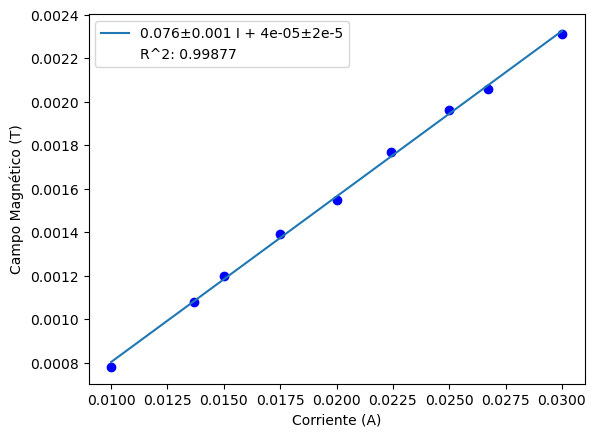

In [4]:
plt.scatter(Corriente,Campo,color="blue")
plt.plot(xsB,ysB, label=str(round(RegB[0],3))+"±0.001 I + "+str(round(RegB[1],5))+"±2e-5")
plt.scatter(0.015,0.0008, color="white", label = "R^2: "+str(round(RegB[2],5)))

plt.xlabel("Corriente (A)")
plt.ylabel("Campo Magnético (T)")
plt.legend()

Se puede identiificicar una tendencia lineal, para la cual es apropiado hacer un ajusta de este tipo. De manera que esa nos permita obtener el campo magnético generado para cada corriente en la segunda parte de la práctica experimental

In [5]:
B2_5


NameError: name 'B2_5' is not defined

In [6]:
xs2=np.linspace(2.32879682e-06,7.91527684e-06)

#r=2cm:

V_2=np.array((100,125,150,175,200,225,250,275))
I_2=np.array((19.5e-3,22.5e-3,25.8e-3,28.4e-3,30.5e-3,32.6e-3,34.7e-3,36.4e-3))
B_2=RegB[0]*I_2 + RegB[1]
B2_2=B_2**2

Reg2=Regresion(B2_2,V_2)
ys2=Reg2[0]*xs2 + Reg2[1]


#r=3cm:

xs3=np.linspace(1.22561024e-06,3.63633801e-06)

V_3=np.array((125,150,175,200,225,250,275,300))
I_3=np.array((14e-3,16.2e-3,18.1e-3,19.6e-3,21.1e-3,22.5e-3,23.5e-3,24.5e-3))
B_3=RegB[0]*I_3 + RegB[1]
B2_3=B_3**2

Reg3=Regresion(B2_3,V_3)
ys3=Reg3[0]*xs3 + Reg3[1]


#r=4cm:

xs4=np.linspace(6.68477743e-07,2.03636062e-06)

V_4=np.array((125,150,175,200,225,250,275,300))
I_4=np.array((10.2e-3,11.8e-3,13.2e-3,14.3e-3,15.7e-3,16.3e-3,17.1e-3,18.2e-3))
B_4=RegB[0]*I_4 + RegB[1]
B2_4=B_4**2

Reg4=Regresion(B2_4,V_4)
ys4=Reg4[0]*xs4 + Reg4[1]

#r=5cm:

xs5=np.linspace(5.72540806e-07,1.41816225e-06)

V_5=np.array((150,175,200,225,250,275,300,325))
I_5=np.array((9.4e-3,10.6e-3,11.6e-3,12.2e-3,13.1e-3,13.8e-3,14.4e-3,15.1e-3))
B_5=RegB[0]*I_5 + RegB[1]
B2_5=B_5**2

Reg5=Regresion(B2_5,V_5)
ys5=Reg5[0]*xs5 + Reg5[1]




In [7]:
B2_2,B2_3,B2_4,B2_5

(array([2.32879682e-06, 3.07850505e-06, 4.02382324e-06, 4.85763355e-06,
        5.58836886e-06, 6.37028441e-06, 7.20338020e-06, 7.91527684e-06]),
 array([1.22561024e-06, 1.62475692e-06, 2.01467791e-06, 2.35210430e-06,
        2.71564305e-06, 3.07850505e-06, 3.35161878e-06, 3.63633801e-06]),
 array([6.68477743e-07, 8.82634173e-07, 1.09439259e-06, 1.27673177e-06,
        1.52910943e-06, 1.64423458e-06, 1.80423386e-06, 2.03636062e-06]),
 array([5.72540806e-07, 7.19231531e-07, 8.54239849e-07, 9.40815479e-07,
        1.07851263e-06, 1.19210950e-06, 1.29400439e-06, 1.41816225e-06]))

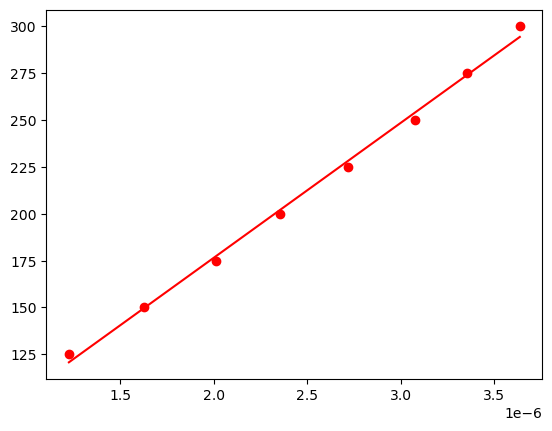

In [90]:
plt.scatter(B2_3,V_3,color="red")
plt.plot(xs3,ys3,color="red",label=str(Reg5[0])+"± B^2 + "+str(Reg5[1])+"±")

In [83]:
xs2

array([2.32879682e-06, 2.44280662e-06, 2.55681641e-06, 2.67082621e-06,
       2.78483601e-06, 2.89884580e-06, 3.01285560e-06, 3.12686539e-06,
       3.24087519e-06, 3.35488499e-06, 3.46889478e-06, 3.58290458e-06,
       3.69691438e-06, 3.81092417e-06, 3.92493397e-06, 4.03894376e-06,
       4.15295356e-06, 4.26696336e-06, 4.38097315e-06, 4.49498295e-06,
       4.60899275e-06, 4.72300254e-06, 4.83701234e-06, 4.95102214e-06,
       5.06503193e-06, 5.17904173e-06, 5.29305152e-06, 5.40706132e-06,
       5.52107112e-06, 5.63508091e-06, 5.74909071e-06, 5.86310051e-06,
       5.97711030e-06, 6.09112010e-06, 6.20512990e-06, 6.31913969e-06,
       6.43314949e-06, 6.54715928e-06, 6.66116908e-06, 6.77517888e-06,
       6.88918867e-06, 7.00319847e-06, 7.11720827e-06, 7.23121806e-06,
       7.34522786e-06, 7.45923765e-06, 7.57324745e-06, 7.68725725e-06,
       7.80126704e-06, 7.91527684e-06])

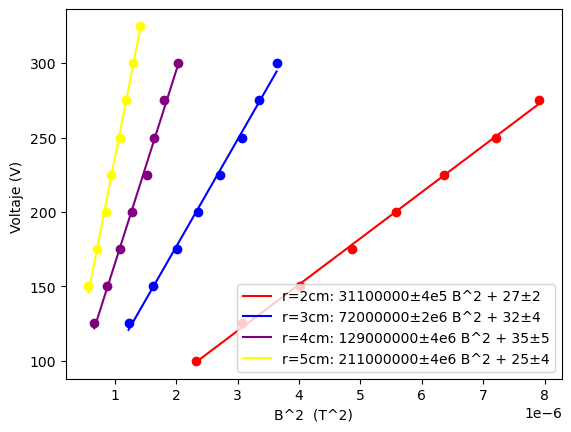

In [11]:
plt.scatter(B2_2,V_2,color="red")
plt.plot(xs2,ys2,color="red",label="r=2cm: "+str(31100000)+"±4e5 B^2 + "+str(round(Reg2[1]))+"±2")
plt.scatter(B2_3,V_3,color="blue")
plt.plot(xs3,ys3,color="blue",label="r=3cm: "+str(72000000)+"±2e6 B^2 + "+str(round(Reg3[1]))+"±4")
plt.scatter(B2_4,V_4,color="purple")
plt.plot(xs4,ys4,color="purple",label="r=4cm: "+str(129000000)+"±4e6 B^2 + "+str(round(Reg4[1]))+"±5")
plt.scatter(B2_5,V_5,color="yellow")
plt.plot(xs5,ys5,color="yellow",label="r=5cm: "+str(211000000)+"±4e6 B^2 + "+str(round(Reg5[1]))+"±4")

plt.xlabel("B^2  (T^2)")
plt.ylabel("Voltaje (V) ")
plt.legend()

In [99]:
e_m2= Reg2[0]*2/(0.02**2)
e_m3=Reg3[0]*2/(0.03**2)
e_m4=Reg4[0]*2/(0.04**2)
e_m5=Reg5[0]*2/(0.05**2)

e_m2,e_m3,e_m4,e_m5

(155415192668.86972, 160021817836.22543, 162424408740.55313, 168532953074.5275)

Para el radio de 2cm se obtuco una relación $e/m$ de $1.55415\times 10^{11}$C/Kg, para 3cm fue de  $1.600218\times 10^{11}$C/Kg, para 4cm de  $1.624244087\times 10^{11}$C/Kg y para 5cm fue de  $1.6853295\times 10^{11}$C/Kg. Valores que cercanos al resportado por CODATA que es de  $1.75882001076\times 10^{11}$C/Kg. Allí se evidencia que para mayores radios se obtuvo un mayor valor de esta razón.


# Ondas

In [109]:
X2_h

array([0.094249, 0.0841  , 0.073984, 0.0625  , 0.0361  ])

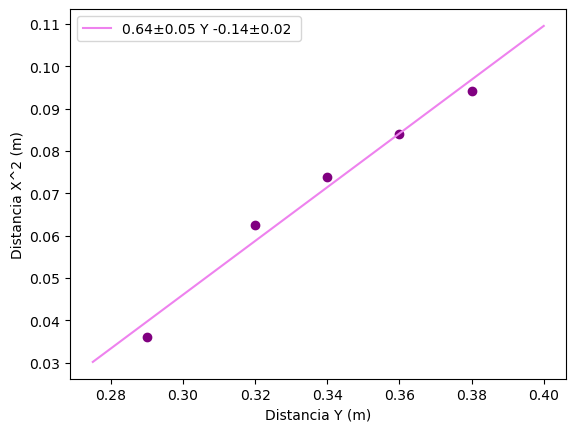

In [116]:
X_h=np.array((30.7e-2,29e-2,27.2e-2,25e-2,19e-2))
Y_h=np.array((38e-2,36e-2,34e-2,32e-2,29e-2))
X2_h=X_h**2

xsss=np.linspace(0.275,0.4)

Reg_H=Regresion(Y_h,X2_h)
ysH=Reg_H[0]*xsss + Reg_H[1]

plt.plot(xsss,ysH, label=str(round(Reg_H[0],2))+ "±0.05 Y "+str(round(Reg_H[1],2)) +"±0.02 ",color="violet")

plt.scatter(Y_h,X2_h,color="purple")
plt.ylabel("Distancia X^2 (m)")
plt.xlabel("Distancia Y (m)")
plt.legend()



In [123]:
X2_y

array([0.094249, 0.081225, 0.063504, 0.049729, 0.027225])

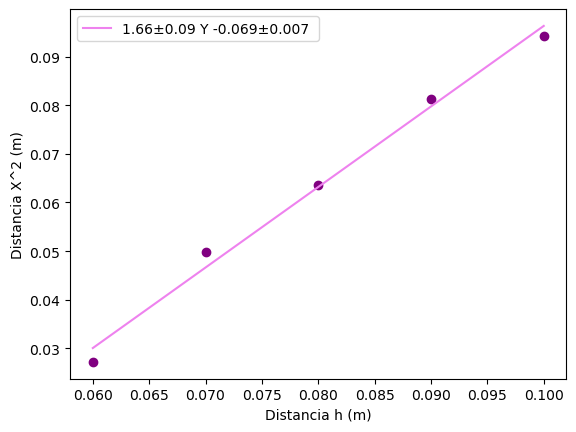

In [125]:
X_y=np.array((30.7e-2,28.5e-2,25.2e-2,22.3e-2,16.5e-2))
H_y= np.array((10e-2,9e-2,8e-2,7e-2,6e-2))
X2_y=X_y**2

xysss=np.linspace(0.06,0.1)

Reg_y=Regresion(H_y,X2_y)
ysy=Reg_y[0]*xysss + Reg_y[1]

plt.plot(xysss,ysy, label=str(round(Reg_y[0],2))+ "±0.09 Y "+str(round(Reg_y[1],3)) +"±0.007 ",color="violet")

plt.scatter(H_y,X2_y,color="purple")
plt.ylabel("Distancia X^2 (m)")
plt.xlabel("Distancia h (m)")
plt.legend()


###### 